## Bootcamp Data Science y MLOps

<img src="https://i.ibb.co/5RM26Cw/LOGO-COLOR2.png" width="500px">

Creado en [escueladedatosvivos.ai](https://escueladedatosvivos.ai) 🚀.
<br>
# Proyecto Final — Predicción de precios de propiedades (Properati AR)

---  

#**Contexto**⛪

Properati es un portal inmobiliario que reúne miles de publicaciones de propiedades en venta y alquiler en distintos países de Latinoamérica.  

El objetivo de este proyecto es construir un modelo de **Machine Learning** capaz de estimar el **precio de venta en dólares** de una propiedad en Argentina, a partir de sus características estructurales y de ubicación.

Este caso simula el trabajo de un equipo de Data Science que debe analizar [datos históricos de Properati](https://www.kaggle.com/datasets/alejandroczernikier/properati-argentina-dataset), definir un conjunto de variables relevantes, entrenar un modelo predictivo y finalmente **desplegar una aplicación interactiva** que permita estimar precios en tiempo real.

El desarrollo se divide en tres partes: **Análisis Exploratorio de Datos (EDA)**, **Modelado** y **Deploy**. Las partes de EDA y modelado se presentarán como un repositorio en GitHub (se evaluará cómo se trabajó con esta herramienta).


# 📊 **Parte 1 — EDA y Preparación de Datos**

### 🎯 **Objetivo**
Explorar el conjunto de datos, aplicar los filtros designados y preparar los datos para la fase de modelado.

### 🔹 **Pasos Sugeridos**
1.  **Cargar el dataset original de Properati**.
2.  **Filtrar** las propiedades según los siguientes criterios:
    *   `country_name = "Argentina"`
    *   `operation_type = "Venta"`
    *   `currency = "USD"`
    *   Zonas: **CABA** y **GBA** (pueden subdividir si lo desean).
3.  **Explorar variables relevantes**:
    *   Superficie (`surface_total`, `surface_covered`)
    *   Ambientes, dormitorios, baños
    *   Ubicación (`place_name`, `state_name`, `lat`, `lon`)
    *   Tipo de propiedad (`property_type`)
    *   Precio (`price_usd`)
4.  **Limpieza y tratamiento de datos**:
    *   Gestionar valores duplicados y nulos irrelevantes.
    *   Decidir **qué variables conservar** para el modelo.
    *   Imputar valores faltantes (si corresponde).
    *   Detectar y manejar **outliers** (ej. establecer límites razonables de superficie/precio).
5.  **Generar un dataset limpio final** y guardarlo como `data/processed.csv`.

> 💡 **Nota:** Se evaluará el criterio de limpieza y el razonamiento detrás de cada decisión. No es necesario que todos apliquen los mismos filtros.

### 🔹 **Entregables de esta parte**
*   **Conclusiones de negocio:** Presentar conclusiones que sirvan para conocer los datos desde una perspectiva de negocio.
*   **Storytelling:** Las conclusiones deben estar apoyadas en una narrativa o storytelling que guíe el análisis.
*   **Código y comentarios:** Mostrar el código utilizado para obtener la información, junto con comentarios que expliquen los pasos realizados.


## 1) Cargamos los datos 📕

In [1]:
# Como estoy trabajando en COLAB inicialmente, tengo que ejecutar estas celdas
# cada vez que arranco a trabaja. La librería FUNPYMODELING no viene por
# default y tengo que autorizar a drive a ver mi contenido.
# !pip install funpymodeling

# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
from funpymodeling.exploratory import status, freq_tbl
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
df = pd.read_csv('/content/drive/MyDrive/EDVAI/dataset/properati.csv', sep = ',')

In [4]:
print(f'Nuestra data tiene filas / columnas: {df.shape}')
df.head(4)

Nuestra data tiene filas / columnas: (992192, 25)


,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
0,556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,...,2.0,NaN,NaN,USD,NaN,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0
1,192912,Propiedad,2020-06-05,2020-06-08,2020-06-05,-58.430493,-34.606620,Argentina,Capital Federal,Almagro,...,2.0,77.0,67.0,USD,NaN,Departamento de 3 ambientes en Venta en Almagro,Excelente departamento de tres ambientes ampli...,Departamento,Venta,235500.0
2,238224,Propiedad,2020-07-01,9999-12-31,2020-07-01,-58.491760,-34.574123,Argentina,Capital Federal,Villa Urquiza,...,1.0,60.0,55.0,USD,NaN,Andonaegui 2600 4° - - Departamento en Venta,Excelente 3 ambientes al frente con balcón. Vi...,Departamento,Venta,175000.0
3,257134,Propiedad,2019-08-17,9999-12-31,2019-08-17,-58.420737,-34.631770,Argentina,Capital Federal,Boedo,...,1.0,74.0,47.0,USD,NaN,PH Venta Boedo 2 amb Patio,Corredor Responsable: MARCELO TRUJILLO - CPI ...,PH,Venta,140000.0


Tenemos una base con 25 columnas, que veremos a continuación y más de 992mil filas. Algunas de las columnas NO tienen asignado un nombre.
En un primer vistazo también vemos que hay datos erróneos en df['end_date']=9999-12-31.

In [5]:
status(df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,id,0,0.000000,0,0.000000,992192,int64
1,ad_type,0,0.000000,0,0.000000,1,object
2,start_date,0,0.000000,0,0.000000,346,object
3,end_date,0,0.000000,0,0.000000,450,object
4,created_on,0,0.000000,0,0.000000,346,object
5,lat,153198,0.154404,0,0.000000,317046,float64
6,lon,152263,0.153461,0,0.000000,315745,float64
7,l1,0,0.000000,0,0.000000,4,object
8,l2,0,0.000000,0,0.000000,42,object
9,l3,57455,0.057907,0,0.000000,1262,object


STATUS() me permite ver un pantallazo inicial de los variables.
A priori saco las siguientes conclusiones:
* Faltan nombres de columnas.
* Hay columnas con muchos missing: como df['l4],df['l5'],df['l6'],df['bedrooms'], df['surface_covered'] y df['price_period'].
* Otras que tienen alta cardinalidad como df['ID'] (que voy eliminar seguro).
* Otros casos como df['description'] y df['title'] que tienen texto escrito por los usuarios, habría que ver si se puede rescatar algo (con REGEX).
* También está df['ad_type'] que solo tiene 1 dato igual en todas las filas (lo voy a eliminar).
* Están df['start_date'] y df['end_date'] que no me van a servir porque no voy a tener esa info, no sé cuánto van a durar publicadas antes de venderse. En este grupo también está df['created_on'].
* La variable objetivo df['price'] tiene un 5% de valores nulos. Luego se evaluará si hay que hacer imputación por promedio de barrio por ejemplo.

 ## 2) Preparación de la data 👀


### 2.  Filtrar las propiedades según los siguientes criterios:
    *   `country_name = "Argentina"`
    *   `operation_type = "Venta"`
    *   `currency = "USD"`
    *   Zonas: **CABA** y **GBA** (pueden subdividir si lo desean).

In [6]:
# En mi data set no tengo bien los nombres de las columnas.
# Por ejemplo: country_name es la columna df['l1']

df_filtrado = df[
    (df['l1'] == 'Argentina') &
    (df['operation_type'] == 'Venta') &
    (df['currency'] == 'USD')
]

print(f"Propiedades después de filtrar país, tipo de operación y moneda: {df_filtrado.shape[0]:} inputs.")
print(f"Previo a realizar filtros teníamos: {df.shape[0]:} inputs.")

Propiedades después de filtrar país, tipo de operación y moneda: 685465 inputs.
Previo a realizar filtros teníamos: 992192 inputs.


In [ ]:
# Ahora vamos a estudiar las zonas. La columna es df['l2']
df_filtrado['l2'].unique()
df_filtrado['l2'].value_counts()

,count
l2,
Capital Federal,169054
Buenos Aires Costa Atlántica,149561
Bs.As. G.B.A. Zona Norte,85377
Bs.As. G.B.A. Zona Sur,84958
Santa Fe,59989
Bs.As. G.B.A. Zona Oeste,55252
Córdoba,41379
Buenos Aires Interior,16456
Mendoza,5552


In [7]:
#Siguiendo la consigna vamos a filtrar Capital Federal, Bs.As. G.B.A. Zona Norte,
#Bs.As. G.B.A. Zona Sur y Bs.As. G.B.A. Zona Oeste.

zonas_a_trabajar = [
    'Capital Federal',
    'Bs.As. G.B.A. Zona Norte',
    'Bs.As. G.B.A. Zona Sur',
    'Bs.As. G.B.A. Zona Oeste'
]

caba_gba = df_filtrado[
    df_filtrado['l2'].isin(zonas_a_trabajar)
].copy()

#Uso .copy() para crear un data set nuevo o independiente del original.

print(f"El data set original tiene: {df.shape[0]:} propiedades.")
print(f"Después de filtrar país, tipo de operación y moneda: {df_filtrado.shape[0]:} propiedades.")
print(f"Dataset final para el análisis: {caba_gba.shape[0]:} propiedades")

El data set original tiene: 992192 propiedades.
Después de filtrar país, tipo de operación y moneda: 685465 propiedades.
Dataset final para el análisis: 394641 propiedades


In [8]:
caba_gba['l2'].value_counts()
# df_filtrado['l2'].value_counts()

,count
l2,
Capital Federal,169054
Bs.As. G.B.A. Zona Norte,85377
Bs.As. G.B.A. Zona Sur,84958
Bs.As. G.B.A. Zona Oeste,55252


### 3.  **Explorar variables relevantes**:
    *   Superficie (`surface_total`, `surface_covered`)
    *   Ambientes, dormitorios, baños
    *   Ubicación (`place_name`, `state_name`, `lat`, `lon`)
    *   Tipo de propiedad (`property_type`)
    *   Precio (`price_usd`)


In [9]:
status(caba_gba)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,id,0,0.000000,0,0.000000,394641,int64
1,ad_type,0,0.000000,0,0.000000,1,object
2,start_date,0,0.000000,0,0.000000,346,object
3,end_date,0,0.000000,0,0.000000,448,object
4,created_on,0,0.000000,0,0.000000,346,object
5,lat,63164,0.160054,0,0.000000,137100,float64
6,lon,62718,0.158924,0,0.000000,136792,float64
7,l1,0,0.000000,0,0.000000,1,object
8,l2,0,0.000000,0,0.000000,4,object
9,l3,21401,0.054229,0,0.000000,90,object


Renombro las columnas que no tienen nombre.

In [10]:
caba_gba = caba_gba.rename(columns={'l1': 'country'})

In [11]:
caba_gba = caba_gba.rename(columns={'l2': 'state_name'})

In [12]:
caba_gba = caba_gba.rename(columns={'l3': 'place_name'})

In [13]:
print(f"La columna caba_gba['14'] tiene: {caba_gba['l4'].isna().sum()} nulos")
print(f"La columna caba_gba['15'] tiene: {caba_gba['l5'].isna().sum()} nulos")
print(f"La columna caba_gba['16'] tiene: {caba_gba['l6'].isna().sum()} nulos")
# No les cambio el nombre porque las voy a eliminar.

La columna caba_gba['14'] tiene: 255517 nulos
La columna caba_gba['15'] tiene: 391664 nulos
La columna caba_gba['16'] tiene: 394641 nulos


Análisis variable por variable, en algunos casos hacemos análisis bivariado.

=== SUPERFICIE TOTAL (surface_total) ===
Valores NaN: 188735
Valores 0: 84
Porcentaje de valores válidos: 52.18%

Estadísticas descriptivas - surface_total:
count   205906.00
mean       396.66
std       3220.74
min       -200.00
1%          18.00
5%          33.00
25%         54.00
50%        100.00
75%        258.00
95%        965.00
99%       3000.00
max     200000.00
Name: surface_total, dtype: float64


=== SUPERFICIE CUBIERTA (surface_covered) ===
Valores NaN: 194154
Valores 0: 0
Porcentaje de valores válidos: 50.80%

Estadísticas descriptivas - surface_covered:
count    200487.00
mean        182.03
std        3428.37
min        -170.00
1%           15.00
5%           30.00
25%          47.00
50%          78.00
75%         155.00
95%         370.00
99%         947.42
max     1350000.00
Name: surface_covered, dtype: float64


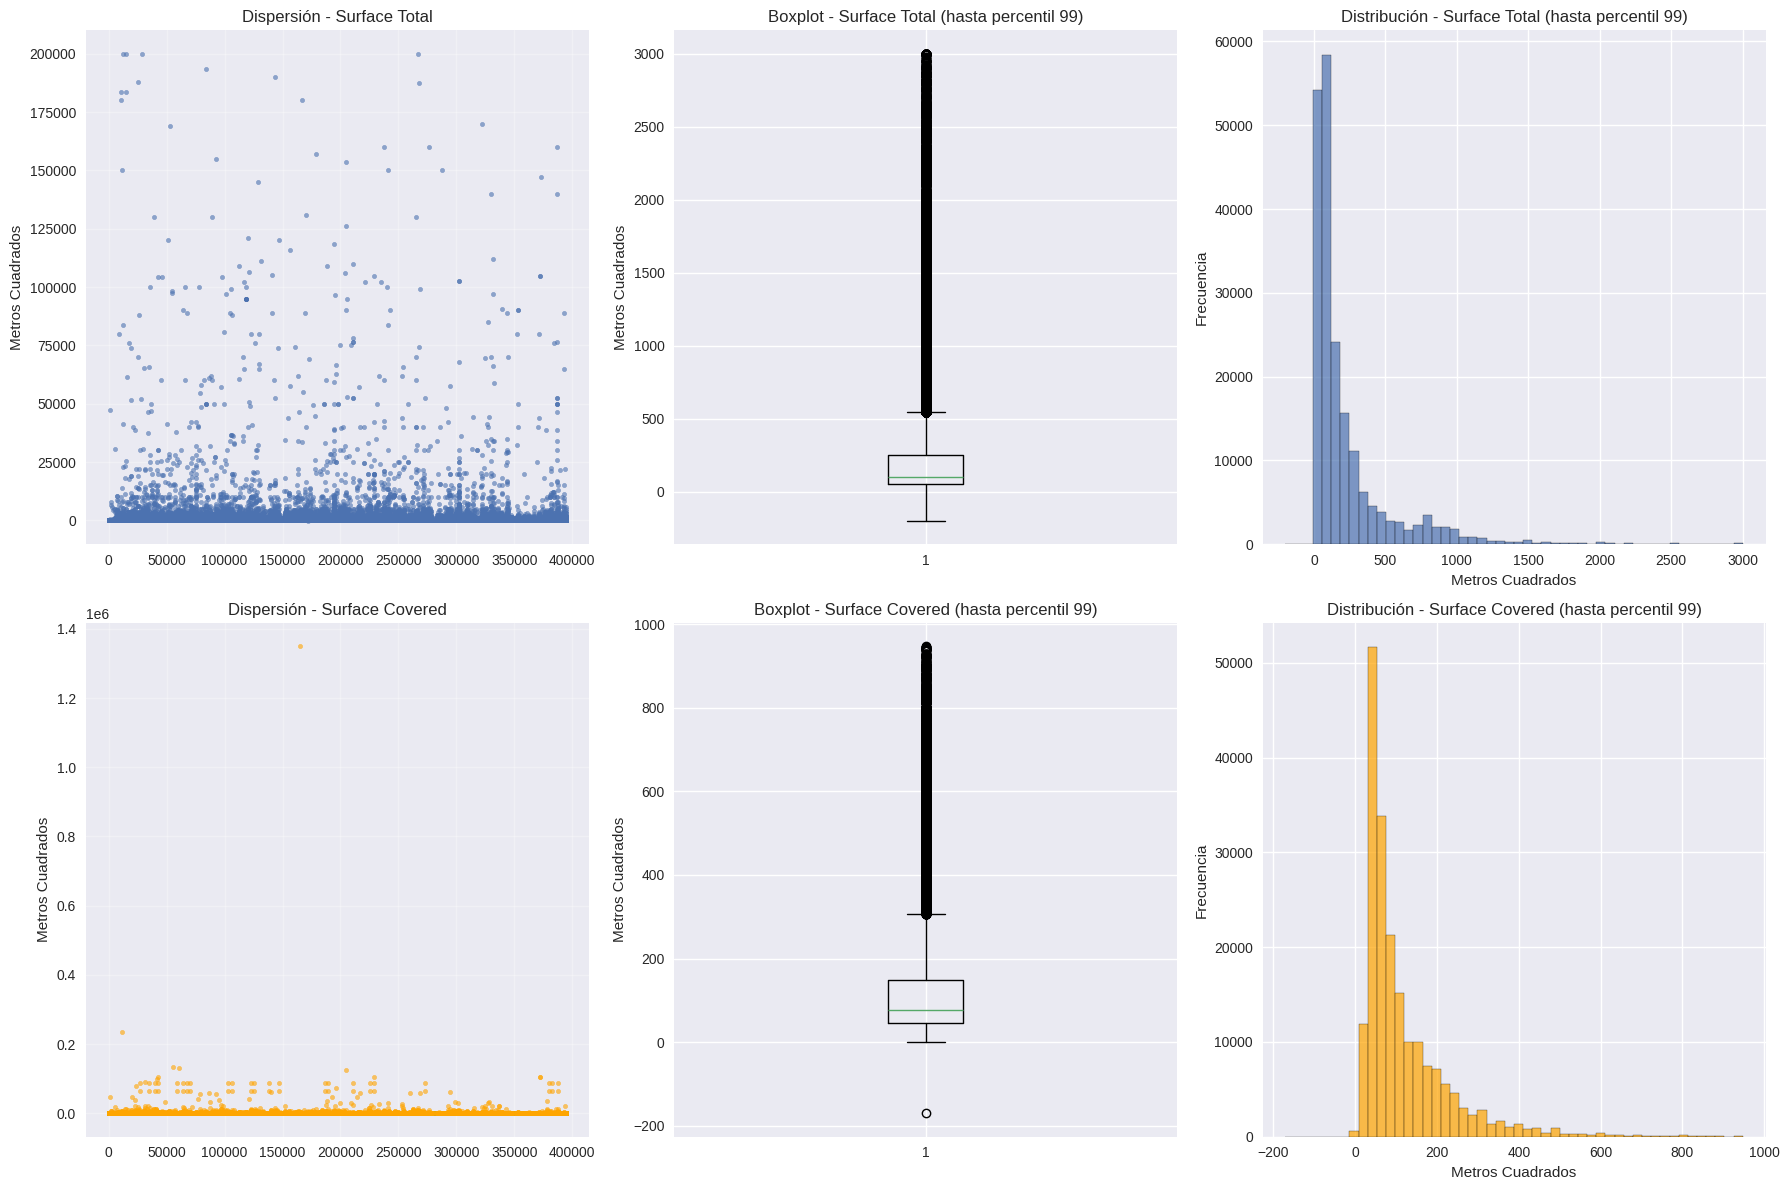

In [14]:
# Superficie (surface_total, surface_covered)
# Configuración para los gráficos/formato normal, no científico de los valores.
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
pd.set_option('display.float_format', '{:.2f}'.format)
# 1. ANÁLISIS DE surface_total
print("=== SUPERFICIE TOTAL (surface_total) ===")
print(f"Valores NaN: {caba_gba['surface_total'].isna().sum()}")
print(f"Valores 0: {(caba_gba['surface_total'] == 0).sum()}")
print(f"Porcentaje de valores válidos: {caba_gba['surface_total'].notna().mean()*100:.2f}%")

# Estadísticas descriptivas
print("\nEstadísticas descriptivas - surface_total:")
print(caba_gba['surface_total'].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]))

# Gráfico 1: Dispersión de surface_total
axes[0,0].scatter(range(len(caba_gba)), caba_gba['surface_total'], alpha=0.6, s=10)
axes[0,0].set_title('Dispersión - Surface Total')
axes[0,0].set_ylabel('Metros Cuadrados')
axes[0,0].grid(True, alpha=0.3)

# Gráfico 2: Boxplot de surface_total (sin outliers extremos)
surface_total_clean = caba_gba['surface_total'].dropna()
q99 = surface_total_clean.quantile(0.99)
axes[0,1].boxplot(surface_total_clean[surface_total_clean <= q99])
axes[0,1].set_title('Boxplot - Surface Total (hasta percentil 99)')
axes[0,1].set_ylabel('Metros Cuadrados')

# Gráfico 3: Histograma de surface_total
axes[0,2].hist(surface_total_clean[surface_total_clean <= q99], bins=50, alpha=0.7, edgecolor='black')
axes[0,2].set_title('Distribución - Surface Total (hasta percentil 99)')
axes[0,2].set_xlabel('Metros Cuadrados')
axes[0,2].set_ylabel('Frecuencia')

# 2. ANÁLISIS DE surface_covered
print("\n\n=== SUPERFICIE CUBIERTA (surface_covered) ===")
print(f"Valores NaN: {caba_gba['surface_covered'].isna().sum()}")
print(f"Valores 0: {(caba_gba['surface_covered'] == 0).sum()}")
print(f"Porcentaje de valores válidos: {caba_gba['surface_covered'].notna().mean()*100:.2f}%")

# Estadísticas descriptivas
print("\nEstadísticas descriptivas - surface_covered:")
print(caba_gba['surface_covered'].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99]))

# Gráfico 4: Dispersión de surface_covered
axes[1,0].scatter(range(len(caba_gba)), caba_gba['surface_covered'], alpha=0.6, s=10, color='orange')
axes[1,0].set_title('Dispersión - Surface Covered')
axes[1,0].set_ylabel('Metros Cuadrados')
axes[1,0].grid(True, alpha=0.3)

# Gráfico 5: Boxplot de surface_covered (sin outliers extremos)
surface_covered_clean = caba_gba['surface_covered'].dropna()
q99_covered = surface_covered_clean.quantile(0.99)
axes[1,1].boxplot(surface_covered_clean[surface_covered_clean <= q99_covered])
axes[1,1].set_title('Boxplot - Surface Covered (hasta percentil 99)')
axes[1,1].set_ylabel('Metros Cuadrados')

# Gráfico 6: Histograma de surface_covered
axes[1,2].hist(surface_covered_clean[surface_covered_clean <= q99_covered], bins=50, alpha=0.7,
               color='orange', edgecolor='black')
axes[1,2].set_title('Distribución - Surface Covered (hasta percentil 99)')
axes[1,2].set_xlabel('Metros Cuadrados')
axes[1,2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()



De las variables **surface_total** y **surface_covered** saco como conclusiones:
1) Tienen muchos nulos (ambas más del 50%).
2) Además de outliers: tanto negativos (imposible) como muy grandes. Si bien puede ser que estén publicando fábricas o edificios enteros, no sólo casas o departamentos, son valores demasiado grandes para ser reales.
3) La mayor concentración se da en propiedades de menos de 100 m2, lo cuál tiene sentido por el tipo de zona que tomé (si fuera en el interior de Bs.As. puedo tener publicados campos por ejemplo).
4) Si vemos los boxplot vemos que la mediana es de 70/100m2 en superficie cubierto/total.


=== AMBIENTES (ROOMS) ===
Valores NaN: 152,224
Valores 0: 0
Porcentaje de valores válidos: 61.43%

Estadísticas descriptivas - rooms:
count   242417.00
mean         2.94
std          1.58
min          1.00
1%           1.00
5%           1.00
25%          2.00
50%          3.00
75%          4.00
95%          6.00
99%          8.00
max         40.00
Name: rooms, dtype: float64

=== DORMITORIOS (BEDROOMS) ===
Valores NaN: 194,501
Valores 0: 13,303
Porcentaje de valores válidos: 50.71%

Estadísticas descriptivas - bedrooms:
count   200140.00
mean         2.16
std          2.87
min         -3.00
1%           0.00
5%           0.00
25%          1.00
50%          2.00
75%          3.00
95%          4.00
99%          6.00
max        900.00
Name: bedrooms, dtype: float64

=== BAÑOS (BATHROOMS) ===
Valores NaN: 79,322
Valores 0: 0
Porcentaje de valores válidos: 79.90%

Estadísticas descriptivas - bathrooms:
count   315319.00
mean         1.73
std          1.07
min          1.00
1%           1.0

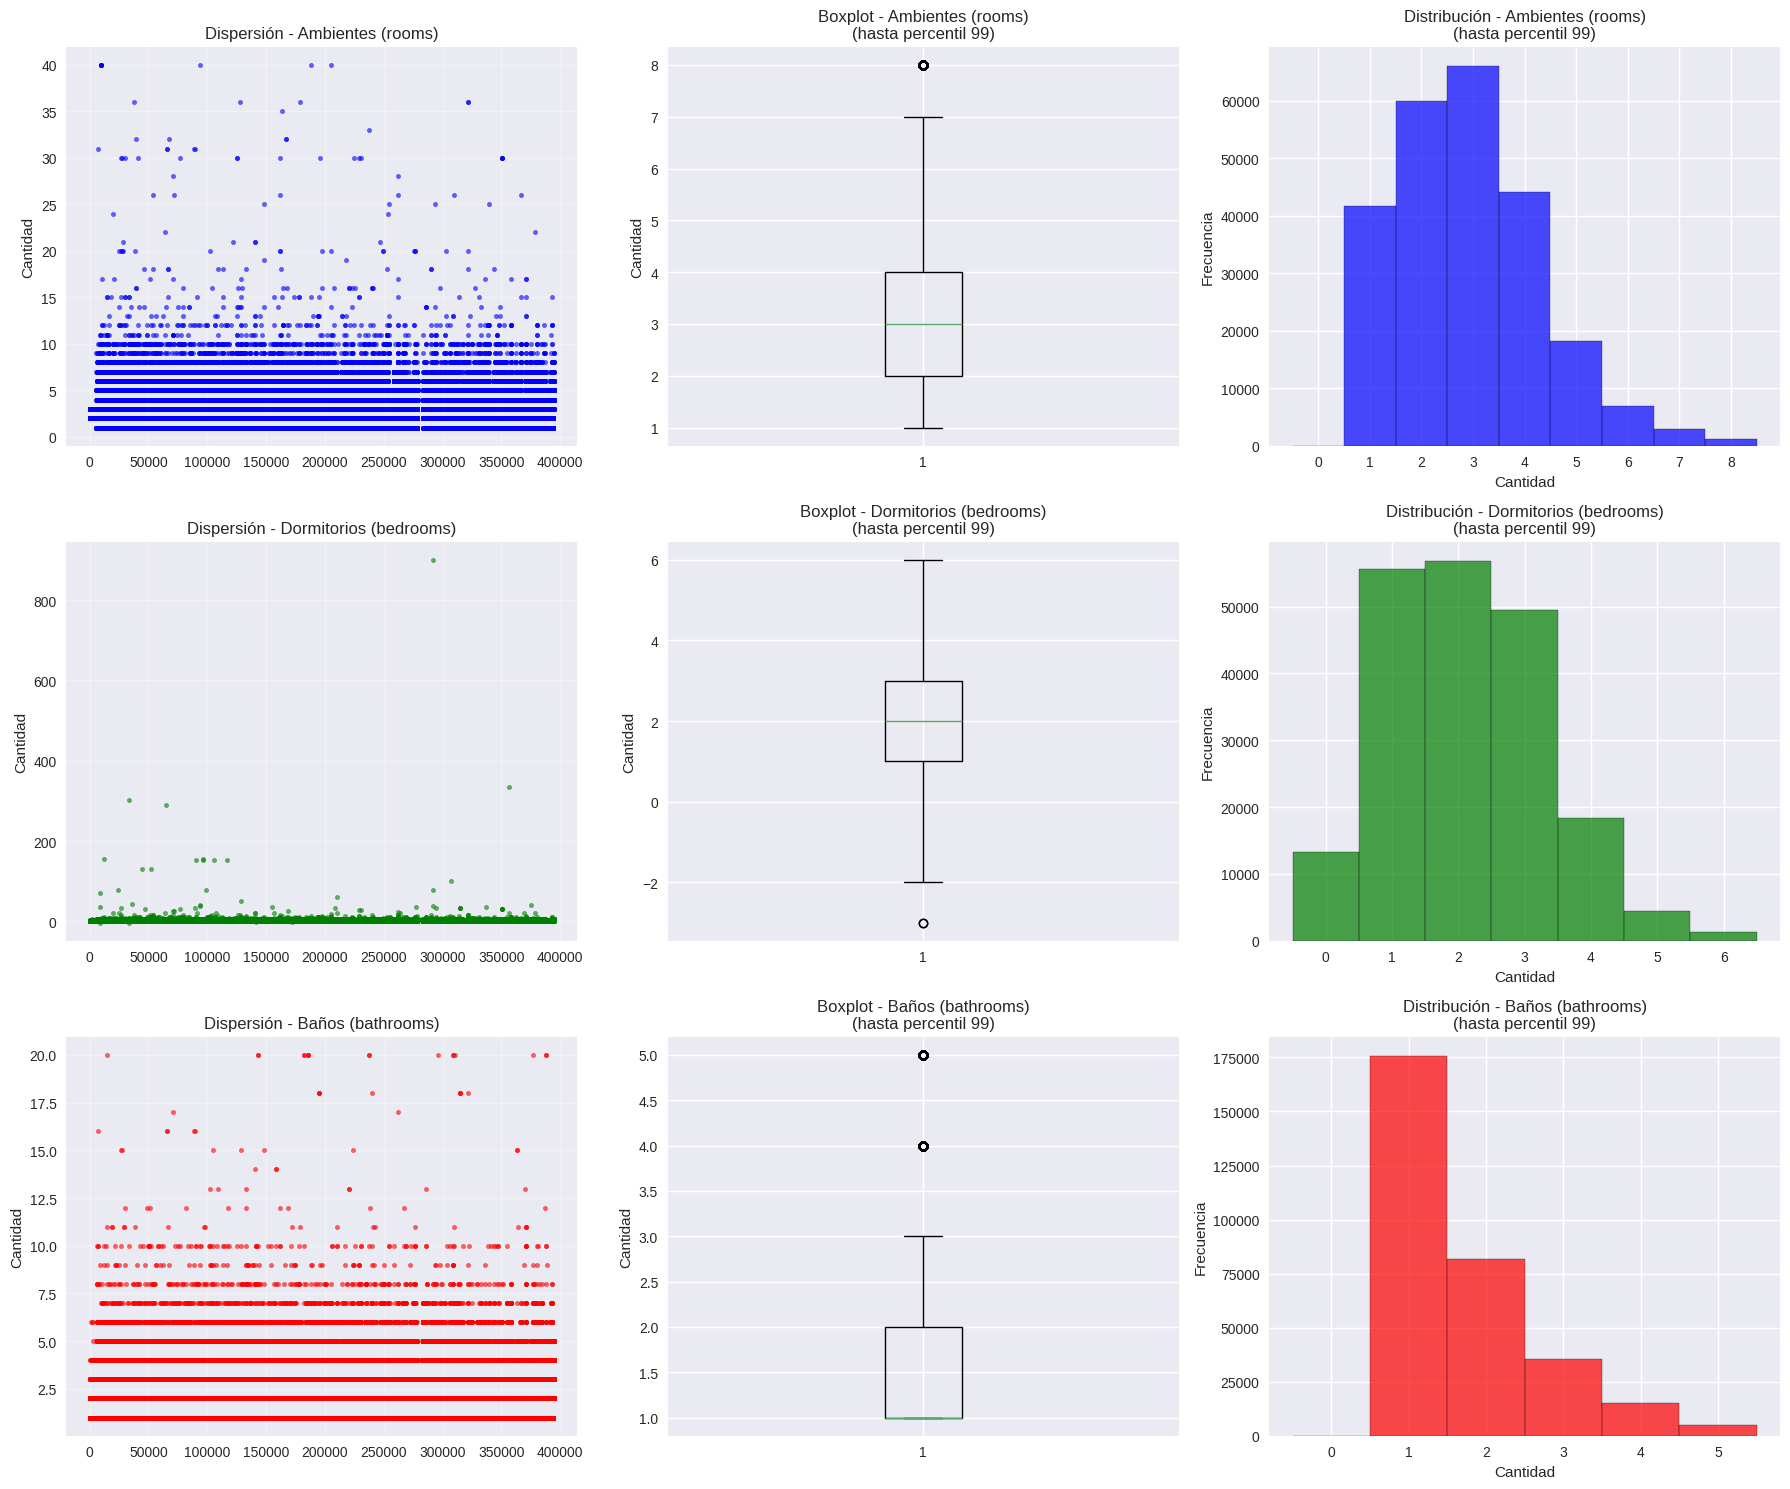

In [15]:
# AMBIENTES (rooms, bedrooms, bathrooms)
# Configuración para los gráficos/formato normal, no científico de los valores.
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
# pd.set_option('display.float_format', '{:.2f}'.f)

# Lista de variables a analizar
variables = ['rooms', 'bedrooms', 'bathrooms']
nombres = ['Ambientes (rooms)', 'Dormitorios (bedrooms)', 'Baños (bathrooms)']
colores = ['blue', 'green', 'red']

for i, (var, nombre, color) in enumerate(zip(variables, nombres, colores)):
    print(f"\n{'='*60}")
    print(f"=== {nombre.upper()} ===")
    print(f"{'='*60}")

    # Análisis de valores faltantes y ceros
    print(f"Valores NaN: {caba_gba[var].isna().sum():,}")
    print(f"Valores 0: {(caba_gba[var] == 0).sum():,}")
    print(f"Porcentaje de valores válidos: {caba_gba[var].notna().mean()*100:.2f}%")

    # Estadísticas descriptivas
    print(f"\nEstadísticas descriptivas - {var}:")
    stats = caba_gba[var].describe(percentiles=[.01, .05, .25, .5, .75, .95, .99])
    print(stats)

    # Gráfico 1: Dispersión
    axes[i,0].scatter(range(len(caba_gba)), caba_gba[var], alpha=0.6, s=10, color=color)
    axes[i,0].set_title(f'Dispersión - {nombre}')
    axes[i,0].set_ylabel('Cantidad')
    axes[i,0].grid(True, alpha=0.3)

    # Gráfico 2: Boxplot (sin outliers extremos)
    var_clean = caba_gba[var].dropna()
    if len(var_clean) > 0:
        q99 = var_clean.quantile(0.99)
        var_filtered = var_clean[var_clean <= q99]
        axes[i,1].boxplot(var_filtered)
        axes[i,1].set_title(f'Boxplot - {nombre}\n(hasta percentil 99)')
        axes[i,1].set_ylabel('Cantidad')

    # Gráfico 3: Histograma
    if len(var_clean) > 0:
        # Para variables discretas, usamos bins enteros
        max_val = int(min(var_filtered.max(), 20))  # Limitamos a 20 para mejor visualización
        bins = range(0, max_val + 2)
        axes[i,2].hist(var_filtered, bins=bins, alpha=0.7, color=color,
                      edgecolor='black', align='left')
        axes[i,2].set_title(f'Distribución - {nombre}\n(hasta percentil 99)')
        axes[i,2].set_xlabel('Cantidad')
        axes[i,2].set_ylabel('Frecuencia')
        axes[i,2].set_xticks(range(0, max_val + 1, max(1, max_val//10)))

plt.tight_layout()
plt.show()

**Conclusiones**
AMBIENTES (ROOMS)
1) El 61% de los casos son nulos.
2) El P75 es 4. El mínimo parece correcto, 1. Pero 40 ambientes excede a la lógica.

DORMITORIOS (BEDROOMS)
1) Hay menos nulos (50%)
2) Hay valores negativos que hay que eliminar.
3) El máximo 900 también parece imposible.
4) Parece guardar relación con la variable ambientes (el P50 de ambientes es 3, y el P50 de dormitorios es 2, lo cual es correcto).

BAÑOS (BATHROOMS)
1) El 80% de los datos es nulo.
2) De los datos completos el P50 es 1.
3) Esta variable seguro la elimine.

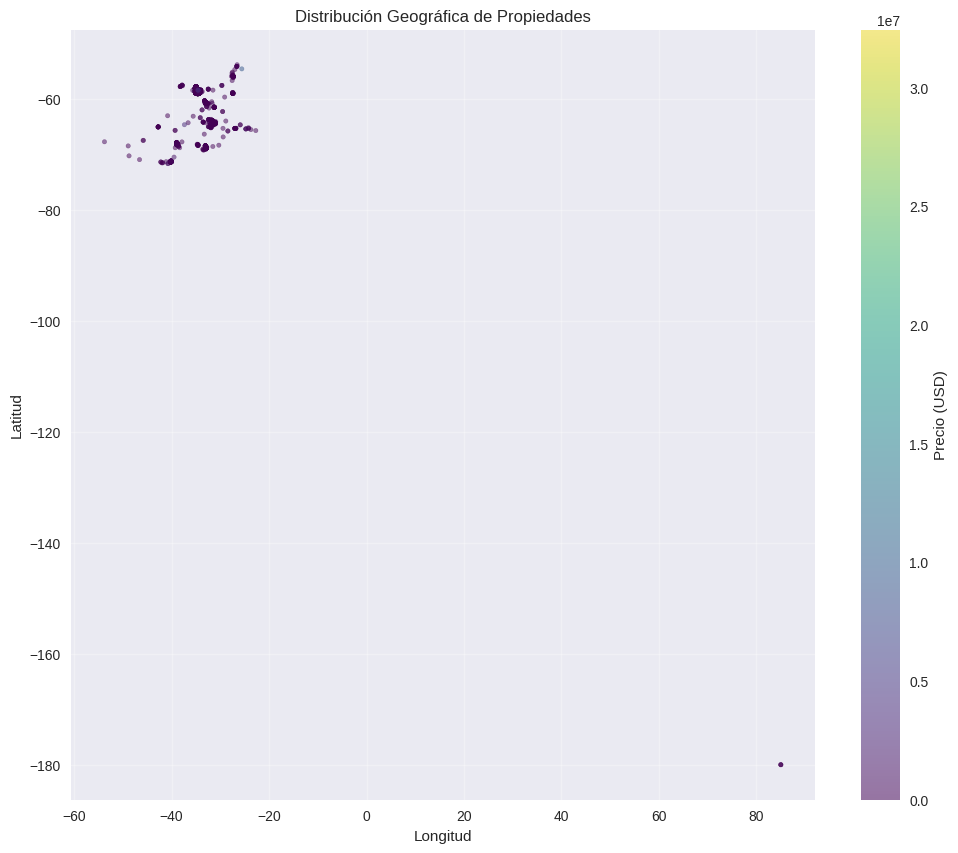

In [16]:
#Ubicación (`place_name`, `state_name`, `lat`, `lon`)
# Para realizar un mapa real necesito traer el shape. Si puedo más adelante lo desarrollo
# anteriormente trabajé con GEOPANDAS pero hay módulos que ya no están disponibles.
# Este cuadro me sirve para ver que al menos casi todos los puntos guardan relación
# con la ubicación. Solo algún punto está muy por fuera. Ese lo voy a eliminar.
# Como filtré inicialmente por CABA y Gran Bs. As. deberían ser todos de esa zona pero
# para evitar errores de tipeo. Ese caso lo voy a eliminar y que no corresponda a otra ubicación.

plt.figure(figsize=(12, 10))
plt.scatter(caba_gba['lon'], caba_gba['lat'],
           c=caba_gba['price'],
           s=10, alpha=0.5, cmap='viridis')
plt.colorbar(label='Precio (USD)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución Geográfica de Propiedades')
plt.grid(True, alpha=0.3)
plt.show()

Conclusiones de **caba_gba['lat'] y caba_gba['lon']**: si bien no llegué a hacer GEOPANDAS o poder volcar los valores en un mapa con su forma, podemos visualizar que todos los puntos están agrupados menos alguno que está excluido. Este valor outlier puede ser un error en la publicación, por lo que será eliminado.

In [21]:
# Contar place_name únicos por state_name Y cantidad de propiedades por cada place_name
conteo_completo = caba_gba.groupby(['state_name', 'place_name']).size().reset_index(name='cantidad_propiedades')

# Resumen por provincia
resumen_provincias = conteo_completo.groupby('state_name').agg({
    'place_name': 'count',  # Cantidad de localidades únicas
    'cantidad_propiedades': 'sum'  # Total de propiedades
}).rename(columns={
    'place_name': 'localidades_unicas',
    'cantidad_propiedades': 'total_propiedades'
}).sort_values('localidades_unicas', ascending=False)

print("📊 RESUMEN POR PROVINCIA:")
print("=" * 60)
print(resumen_provincias)

📊 RESUMEN POR PROVINCIA:
                          localidades_unicas  total_propiedades
state_name                                                     
Capital Federal                           58             149526
Bs.As. G.B.A. Zona Sur                    13              84910
Bs.As. G.B.A. Zona Norte                  10              83678
Bs.As. G.B.A. Zona Oeste                   9              55126


In [22]:
# Mostrar el detalle completo
print("📍 DETALLE POR LOCALIDAD:")
print("=" * 80)
for state in conteo_completo['state_name'].unique():
    print(f"\n🏛️  PROVINCIA: {state}")
    print("-" * 40)

    localidades_provincia = conteo_completo[conteo_completo['state_name'] == state].sort_values('cantidad_propiedades', ascending=False)

    for _, row in localidades_provincia.iterrows():
        print(f"   🏠 {row['place_name']}: {row['cantidad_propiedades']} propiedades")

📍 DETALLE POR LOCALIDAD:

🏛️  PROVINCIA: Bs.As. G.B.A. Zona Norte
----------------------------------------
   🏠 Tigre: 26281 propiedades
   🏠 Pilar: 13604 propiedades
   🏠 Escobar: 11266 propiedades
   🏠 San Isidro: 8487 propiedades
   🏠 General San Martín: 7927 propiedades
   🏠 Vicente López: 7500 propiedades
   🏠 San Miguel: 3970 propiedades
   🏠 San Fernando: 2819 propiedades
   🏠 Malvinas Argentinas: 1180 propiedades
   🏠 José C Paz: 644 propiedades

🏛️  PROVINCIA: Bs.As. G.B.A. Zona Oeste
----------------------------------------
   🏠 Morón: 13142 propiedades
   🏠 Ituzaingó: 11119 propiedades
   🏠 La Matanza: 9623 propiedades
   🏠 Moreno: 6705 propiedades
   🏠 Tres de Febrero: 6617 propiedades
   🏠 Hurlingham: 2692 propiedades
   🏠 Merlo: 2625 propiedades
   🏠 General Rodríguez: 2299 propiedades
   🏠 Marcos Paz: 304 propiedades

🏛️  PROVINCIA: Bs.As. G.B.A. Zona Sur
----------------------------------------
   🏠 La Plata: 26376 propiedades
   🏠 Lomas de Zamora: 17107 propiedades
   

Conclusines de caba_gba['place_name'] y caba_gba['state_name']: vemos que hay bastante presencia de propiedades en distintos barrios. Quizás podríamos eliminar los uqe tiene menos de 100 propiedades.

=== ANÁLISIS DE PROPERTY_TYPE ===
Total de registros: 394,641
Valores NaN: 0
Valores vacíos (''): 0
Porcentaje de valores válidos: 100.00%

Valores únicos en property_type: 10

Distribución de property_type:
property_type
Departamento       160160
Casa                87088
Otro                62817
Lote                36081
PH                  20387
Local comercial     10604
Oficina              8295
Cochera              5729
Depósito             2682
Casa de campo         798
Name: count, dtype: int64


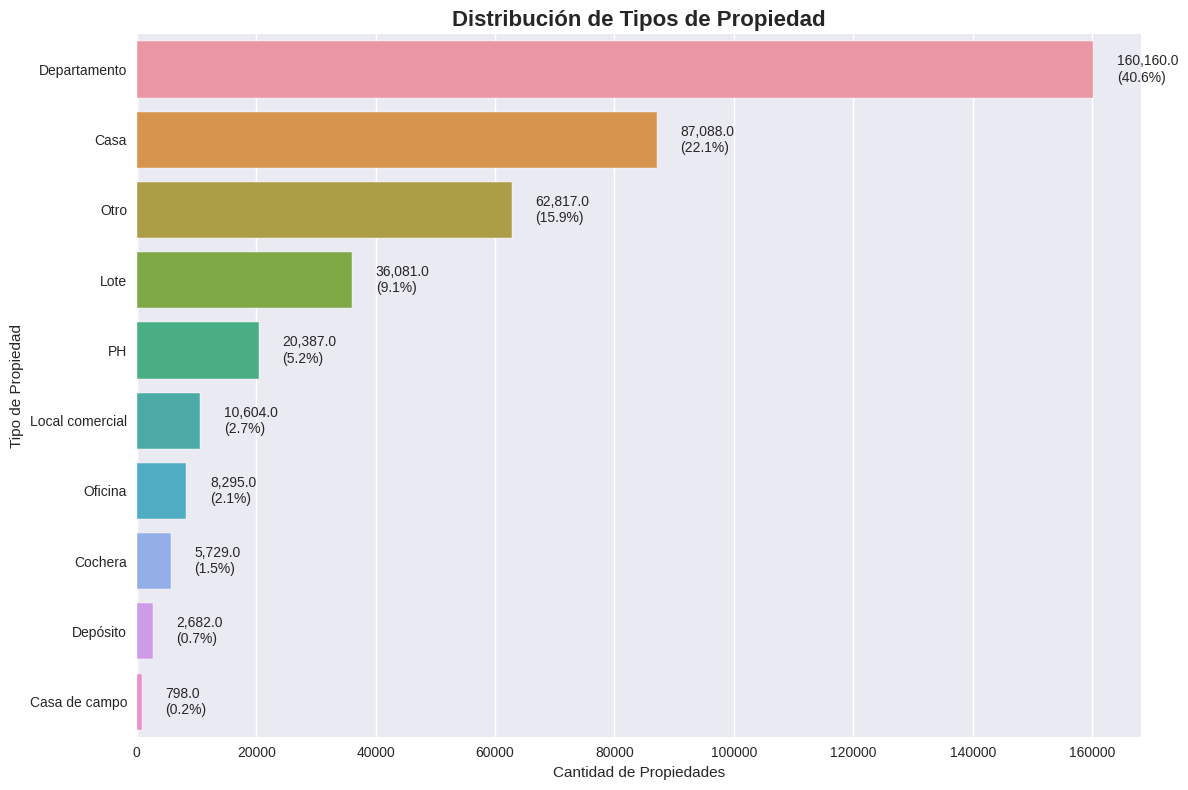

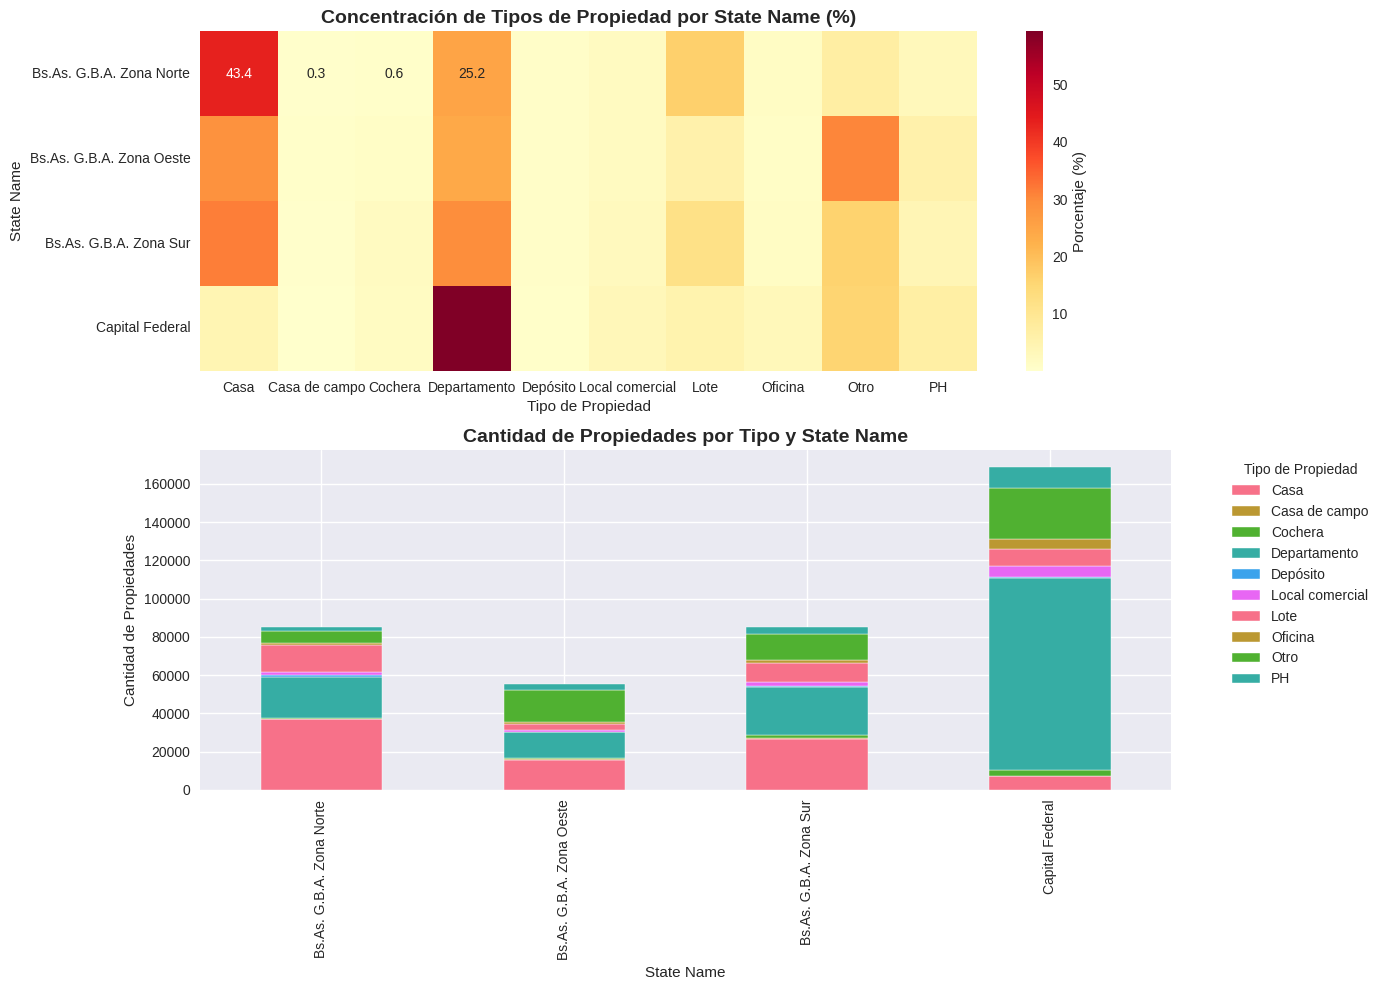

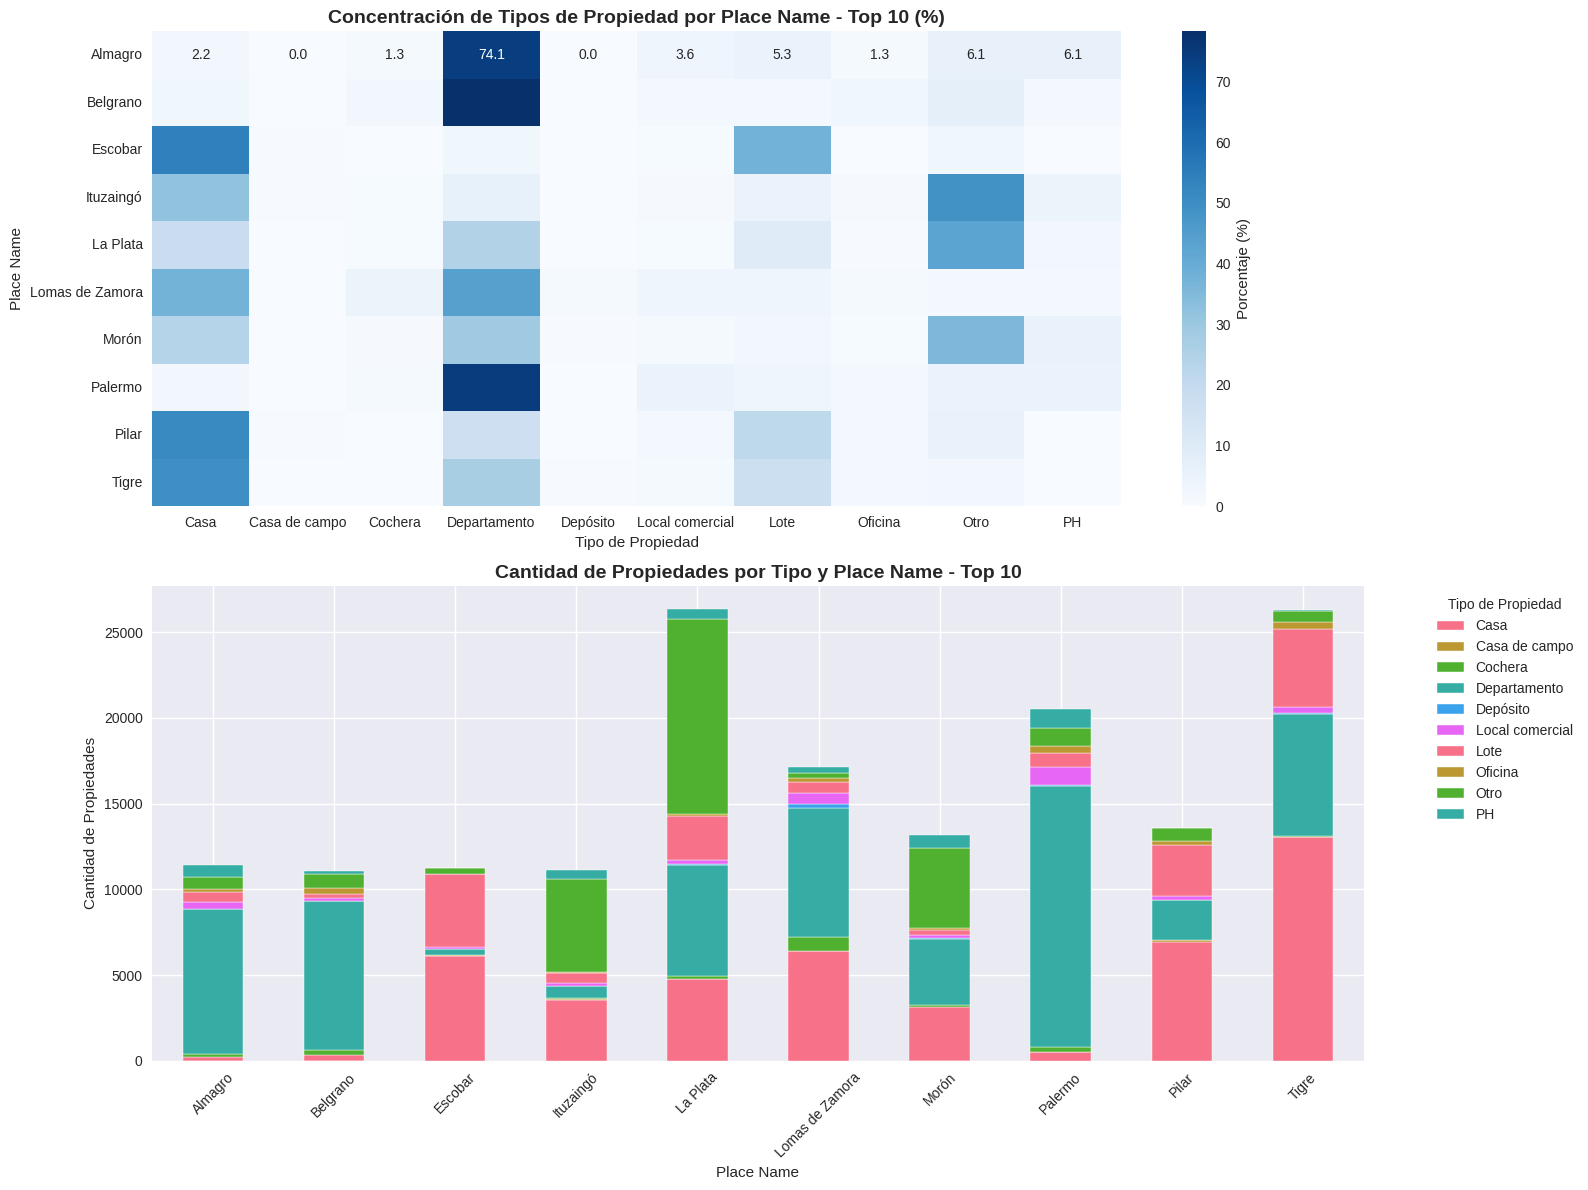

In [23]:
# Tipo de propiedad (property_type)
# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. ANÁLISIS BÁSICO DE property_type
print("=== ANÁLISIS DE PROPERTY_TYPE ===")
print(f"Total de registros: {len(caba_gba):,}")

# Verificar valores nulos y vacíos
nan_count = caba_gba['property_type'].isna().sum()
empty_count = (caba_gba['property_type'] == '').sum() if 'property_type' in caba_gba.columns else 0

print(f"Valores NaN: {nan_count:,}")
print(f"Valores vacíos (''): {empty_count:,}")
print(f"Porcentaje de valores válidos: {(1 - (nan_count + empty_count) / len(caba_gba)) * 100:.2f}%")

# Valores únicos y sus frecuencias
print(f"\nValores únicos en property_type: {caba_gba['property_type'].nunique()}")
print("\nDistribución de property_type:")
property_counts = caba_gba['property_type'].value_counts(dropna=False)
print(property_counts)

# 2. GRÁFICO DE BARRAS - CONCENTRACIÓN POR TIPO DE PROPIEDAD
plt.figure(figsize=(12, 8))
property_order = caba_gba['property_type'].value_counts().index

# Gráfico de barras horizontal para mejor visualización
ax1 = sns.countplot(data=caba_gba, y='property_type', order=property_order)
plt.title('Distribución de Tipos de Propiedad', fontsize=16, fontweight='bold')
plt.xlabel('Cantidad de Propiedades')
plt.ylabel('Tipo de Propiedad')

# Agregar etiquetas con los porcentajes
total = len(caba_gba)
for i, p in enumerate(ax1.patches):
    percentage = f'{100 * p.get_width() / total:.1f}%'
    ax1.text(p.get_width() + total * 0.01, p.get_y() + p.get_height() / 2,
             f'{p.get_width():,}\n({percentage})',
             ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# 3. GRÁFICO POR STATE_NAME (si existe la columna)
if 'state_name' in caba_gba.columns:
    plt.figure(figsize=(14, 10))

    # Crear tabla pivote para el heatmap
    state_property = pd.crosstab(caba_gba['state_name'], caba_gba['property_type'], normalize='index') * 100

    # Heatmap
    plt.subplot(2, 1, 1)
    sns.heatmap(state_property, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Porcentaje (%)'})
    plt.title('Concentración de Tipos de Propiedad por State Name (%)', fontsize=14, fontweight='bold')
    plt.ylabel('State Name')
    plt.xlabel('Tipo de Propiedad')

    # Countplot por state_name
    plt.subplot(2, 1, 2)
    state_property_count = pd.crosstab(caba_gba['state_name'], caba_gba['property_type'])
    state_property_count.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title('Cantidad de Propiedades por Tipo y State Name', fontsize=14, fontweight='bold')
    plt.ylabel('Cantidad de Propiedades')
    plt.xlabel('State Name')
    plt.legend(title='Tipo de Propiedad', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ La columna 'state_name' no existe en el dataset")

# 4. GRÁFICO POR PLACE_NAME
plt.figure(figsize=(16, 12))

# Tomar los top 10 place_name por cantidad de propiedades para mejor visualización
top_places = caba_gba['place_name'].value_counts().head(10).index
caba_gba_top_places = caba_gba[caba_gba['place_name'].isin(top_places)]

# Heatmap porcentual
plt.subplot(2, 1, 1)
place_property_pct = pd.crosstab(caba_gba_top_places['place_name'],
                                caba_gba_top_places['property_type'],
                                normalize='index') * 100

sns.heatmap(place_property_pct, annot=True, fmt='.1f', cmap='Blues',
            cbar_kws={'label': 'Porcentaje (%)'})
plt.title('Concentración de Tipos de Propiedad por Place Name - Top 10 (%)',
          fontsize=14, fontweight='bold')
plt.ylabel('Place Name')
plt.xlabel('Tipo de Propiedad')

# Countplot por place_name
plt.subplot(2, 1, 2)
place_property_count = pd.crosstab(caba_gba_top_places['place_name'],
                                  caba_gba_top_places['property_type'])

place_property_count.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Cantidad de Propiedades por Tipo y Place Name - Top 10',
          fontsize=14, fontweight='bold')
plt.ylabel('Cantidad de Propiedades')
plt.xlabel('Place Name')
plt.legend(title='Tipo de Propiedad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Conclusiones
TIPOS DE PROPIEDAD (property_type)
1) El 40% corresponde a departamentos, el 22% a casas. Mayormante se trata de viviendas.
2) Si analizo por región/state_name las casas está en Bs.As. GBA Zona Norte, mientras que en CABA casi la totalidad son departamentos.
3) Si hago el mismo análisis por barrio/place_name en Almagro (Barrio de Capital Federal) tenemos la mayor concentración de departamentos, seguido de Belgrano y Palermo.
En cambio las casas están en Escobar, Pilar y Tigre (Zona Norte). En Ituzaingó (Zona Oeste) tenemos mucha presencia de "otro" tipo de propiedad.
4) Si bien no hay datos nulos, quizás podríamos considerar como "nulos" los informados como "otro" dado que no aporta información.

En función a esto probablemente me termine quedando solo con las propiedades vinculadas a viviendas: departamento, casa y PH.

=== ANÁLISIS DE PRICE ===
Total de registros: 394,641
Valores NaN: 0
Valores = 0: 111
Valores < 0: 0
Porcentaje de valores válidos (>0): 99.97%

Estadísticas descriptivas - price:
count     394530.00
mean      257232.54
std       438818.99
min            1.00
1%         16000.00
5%         35000.00
25%        90000.00
50%       150000.00
75%       275000.00
90%       490000.00
95%       760000.00
99%      1850000.00
max     32434232.00
Name: price, dtype: float64


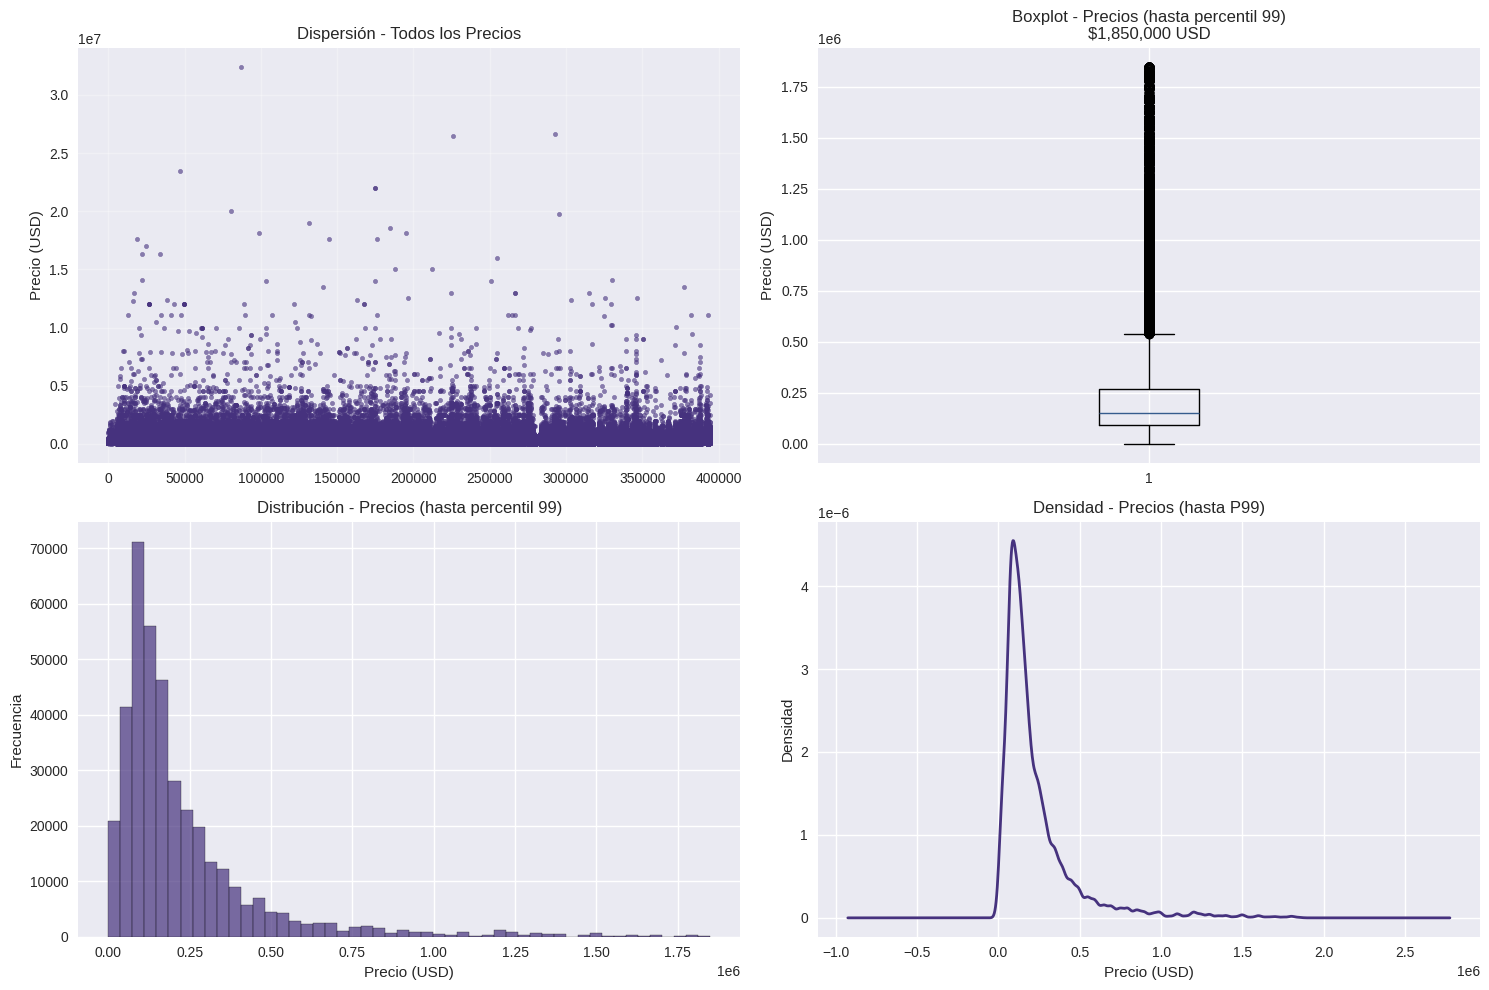


RESUMEN EJECUTIVO - PRICE
💰 Precio promedio: $257,233 USD
💰 Precio mediano: $150,000 USD
📊 Rango intercuartílico (IQR): $185,000 USD
🏆 Zona más cara (mediana): Puerto Madero ($700,000 USD)
🏠 Tipo de propiedad más caro (mediana): Depósito ($350,000 USD)


In [24]:
# PRECIO (price)
# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

# 1. ANÁLISIS BÁSICO DE PRICE
print("=== ANÁLISIS DE PRICE ===")
print(f"Total de registros: {len(caba_gba):,}")

# Verificar valores nulos, ceros y negativos
nan_count = caba_gba['price'].isna().sum()
zero_count = (caba_gba['price'] == 0).sum()
negative_count = (caba_gba['price'] < 0).sum()

print(f"Valores NaN: {nan_count:,}")
print(f"Valores = 0: {zero_count:,}")
print(f"Valores < 0: {negative_count:,}")
print(f"Porcentaje de valores válidos (>0): {((len(caba_gba) - nan_count - zero_count - negative_count) / len(caba_gba)) * 100:.2f}%")

# Filtrar solo valores válidos para análisis
price_valid = caba_gba[caba_gba['price'] > 0]['price'].dropna()

# 2. ESTADÍSTICAS DESCRIPTIVAS
print(f"\nEstadísticas descriptivas - price:")
print(price_valid.describe(percentiles=[.01, .05, .25, .5, .75, .90, .95, .99]))

# 3. GRÁFICOS DE DISTRIBUCIÓN Y OUTLIERS
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: Dispersión de todos los precios
axes[0,0].scatter(range(len(price_valid)), price_valid, alpha=0.6, s=10)
axes[0,0].set_title('Dispersión - Todos los Precios')
axes[0,0].set_ylabel('Precio (USD)')
axes[0,0].grid(True, alpha=0.3)

# Gráfico 2: Boxplot (sin outliers extremos)
q99 = price_valid.quantile(0.99)
price_filtered = price_valid[price_valid <= q99]
axes[0,1].boxplot(price_filtered)
axes[0,1].set_title(f'Boxplot - Precios (hasta percentil 99)\n${q99:,.0f} USD')
axes[0,1].set_ylabel('Precio (USD)')

# Gráfico 3: Histograma (sin outliers extremos)
axes[1,0].hist(price_filtered, bins=50, alpha=0.7, edgecolor='black')
axes[1,0].set_title('Distribución - Precios (hasta percentil 99)')
axes[1,0].set_xlabel('Precio (USD)')
axes[1,0].set_ylabel('Frecuencia')

# Gráfico 4: Gráfico de densidad
price_filtered.plot.density(ax=axes[1,1], linewidth=2)
axes[1,1].set_title('Densidad - Precios (hasta P99)')
axes[1,1].set_xlabel('Precio (USD)')
axes[1,1].set_ylabel('Densidad')

plt.tight_layout()
plt.show()

#RESUMEN POR PLACE NAME y STATE NAME:
print("\n" + "="*80)
print("RESUMEN EJECUTIVO - PRICE")
print("="*80)

print(f"💰 Precio promedio: ${price_valid.mean():,.0f} USD")
print(f"💰 Precio mediano: ${price_valid.median():,.0f} USD")
print(f"📊 Rango intercuartílico (IQR): ${price_valid.quantile(0.75) - price_valid.quantile(0.25):,.0f} USD")

if 'place_name' in caba_gba.columns:
    most_expensive_zone = caba_gba[caba_gba['price'] > 0].groupby('place_name')['price'].median().idxmax()
    median_price_most_expensive = caba_gba[caba_gba['price'] > 0].groupby('place_name')['price'].median().max()
    print(f"🏆 Zona más cara (mediana): {most_expensive_zone} (${median_price_most_expensive:,.0f} USD)")

if 'property_type' in caba_gba.columns:
    most_expensive_type = caba_gba[caba_gba['price'] > 0].groupby('property_type')['price'].median().idxmax()
    median_price_most_expensive_type = caba_gba[caba_gba['price'] > 0].groupby('property_type')['price'].median().max()
    print(f"🏠 Tipo de propiedad más caro (mediana): {most_expensive_type} (${median_price_most_expensive_type:,.0f} USD)")

📈 ANÁLISIS DE PRECIOS - 267635 propiedades
ESTADÍSTICAS DESCRIPTIVAS:
                  count      mean       std     min       25%       50%  \
property_type                                                             
Casa           87088.00 323533.63 347475.91    0.00 145000.00 240000.00   
Departamento  160160.00 203178.75 296512.86    0.00  92000.00 135000.00   
PH             20387.00 171397.88 131996.96 7000.00  92000.00 140000.00   

                    75%         max  
property_type                        
Casa          380000.00 11111111.00  
Departamento  219000.00 32434232.00  
PH            219000.00  6300000.00  


/tmp/ipython-input-326618505.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df_filtrado, x='property_type', y='price', ci=95)


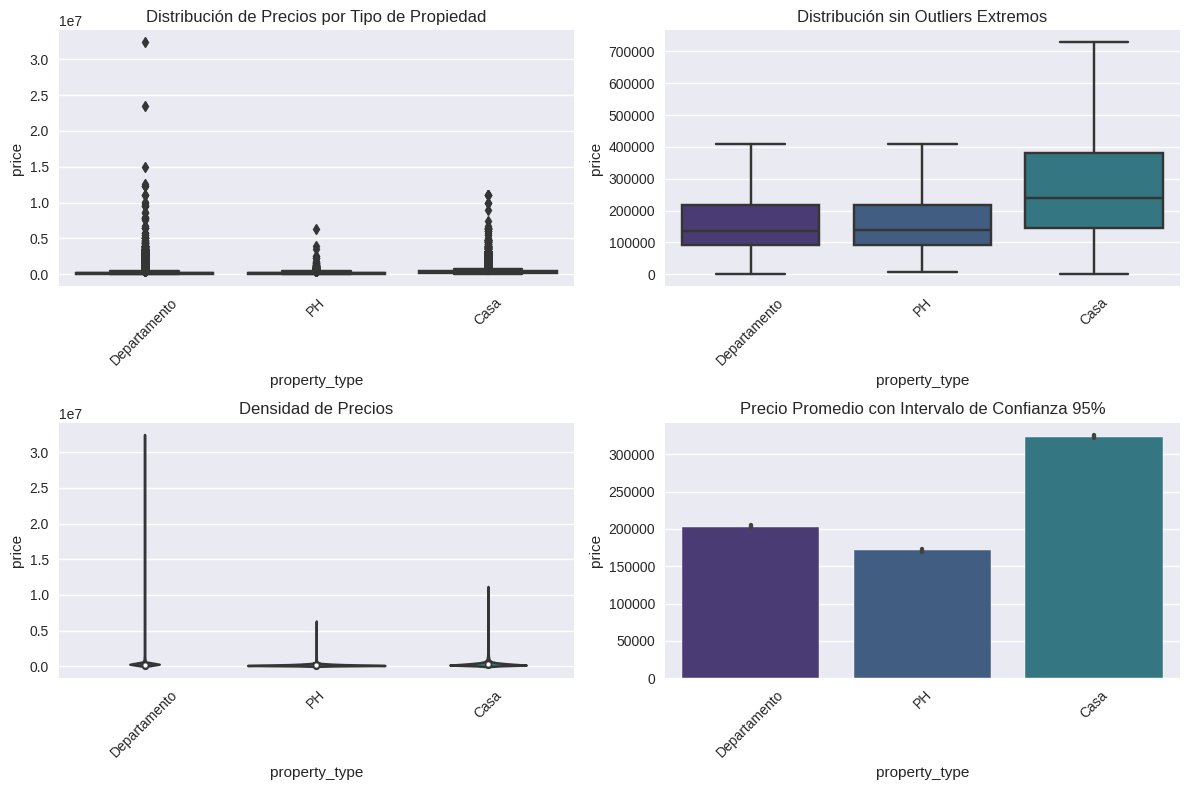

In [28]:
# Filtrar solo los tipos de propiedad que nos interesan (VIVIENDAS)
tipos_interes = ['Departamento', 'Casa', 'PH']
df_filtrado = caba_gba[caba_gba['property_type'].isin(tipos_interes)].copy()

print(f"📈 ANÁLISIS DE PRECIOS - {len(df_filtrado)} propiedades")
print("=" * 60)

# Estadísticas básicas por tipo de propiedad
estadisticas = df_filtrado.groupby('property_type')['price'].describe()
print("ESTADÍSTICAS DESCRIPTIVAS:")
print(estadisticas)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# Boxplot de precios por tipo de propiedad
plt.subplot(2, 2, 1)
sns.boxplot(data=df_filtrado, x='property_type', y='price')
plt.title('Distribución de Precios por Tipo de Propiedad')
plt.xticks(rotation=45)

# Boxplot sin outliers extremos para mejor visualización
plt.subplot(2, 2, 2)
sns.boxplot(data=df_filtrado, x='property_type', y='price', showfliers=False)
plt.title('Distribución sin Outliers Extremos')
plt.xticks(rotation=45)

# Violin plot para ver densidad
plt.subplot(2, 2, 3)
sns.violinplot(data=df_filtrado, x='property_type', y='price')
plt.title('Densidad de Precios')
plt.xticks(rotation=45)

# Precio promedio con intervalos de confianza
plt.subplot(2, 2, 4)
sns.barplot(data=df_filtrado, x='property_type', y='price', ci=95)
plt.title('Precio Promedio con Intervalo de Confianza 95%')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Conclusiones de **caba_gba['price']**:
* Unas 267mil propiedades corresponden a viviendas.
* Las casas son más caras que los departamentos y PH. La mediana es de usd 200mil aprox mientras que en las otras USD 150 mil.
* Hay outliers que limpiar en todas.

#### Información extra de la base

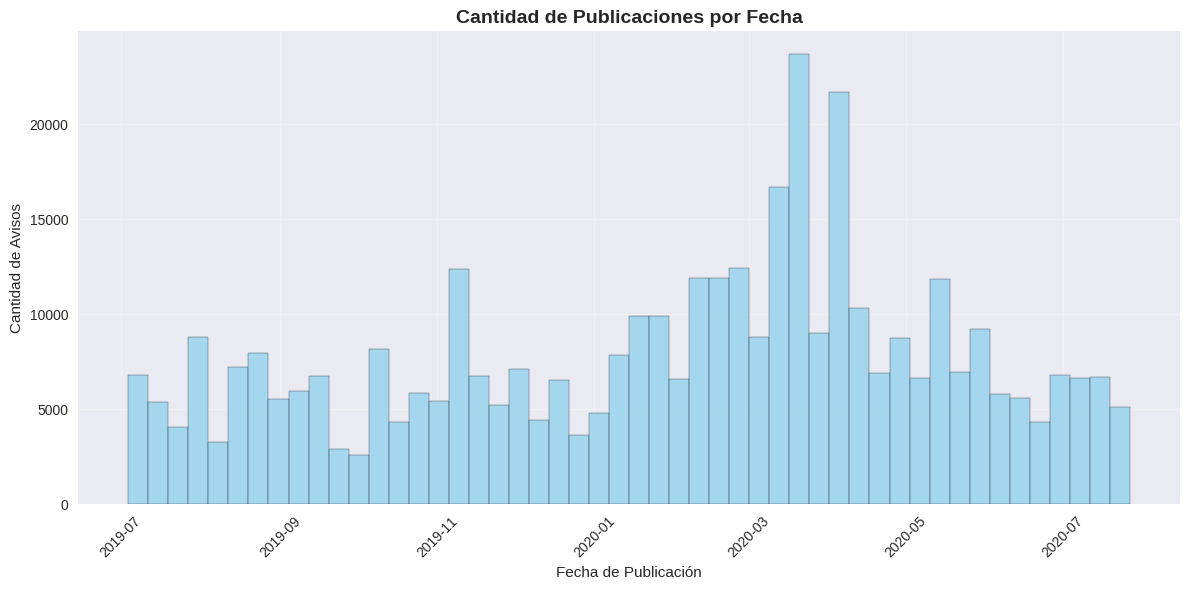

=== ESTADÍSTICAS DE FECHAS DE PUBLICACIÓN ===
Fecha más antigua: 2019-07-04 00:00:00
Fecha más reciente: 2020-07-27 00:00:00
Rango total: 389 days 00:00:00
Total de publicaciones: 394,641


In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Convertir la columna created_on a datetime
caba_gba['created_on'] = pd.to_datetime(caba_gba['created_on'])

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.hist(caba_gba['created_on'].dropna(), bins=50, alpha=0.7, edgecolor='black', color='skyblue')
plt.title('Cantidad de Publicaciones por Fecha', fontsize=14, fontweight='bold')
plt.xlabel('Fecha de Publicación')
plt.ylabel('Cantidad de Avisos')
plt.grid(True, alpha=0.3)

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Estadísticas adicionales
print("=== ESTADÍSTICAS DE FECHAS DE PUBLICACIÓN ===")
print(f"Fecha más antigua: {caba_gba['created_on'].min()}")
print(f"Fecha más reciente: {caba_gba['created_on'].max()}")
print(f"Rango total: {caba_gba['created_on'].max() - caba_gba['created_on'].min()}")
print(f"Total de publicaciones: {len(caba_gba['created_on'].dropna()):,}")

📊 ANÁLISIS TEMPORAL DE PROPIEDADES EN VENTA


/tmp/ipython-input-3719099947.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  publicaciones_por_mes = caba_gba.set_index('created_on').resample('M').size()


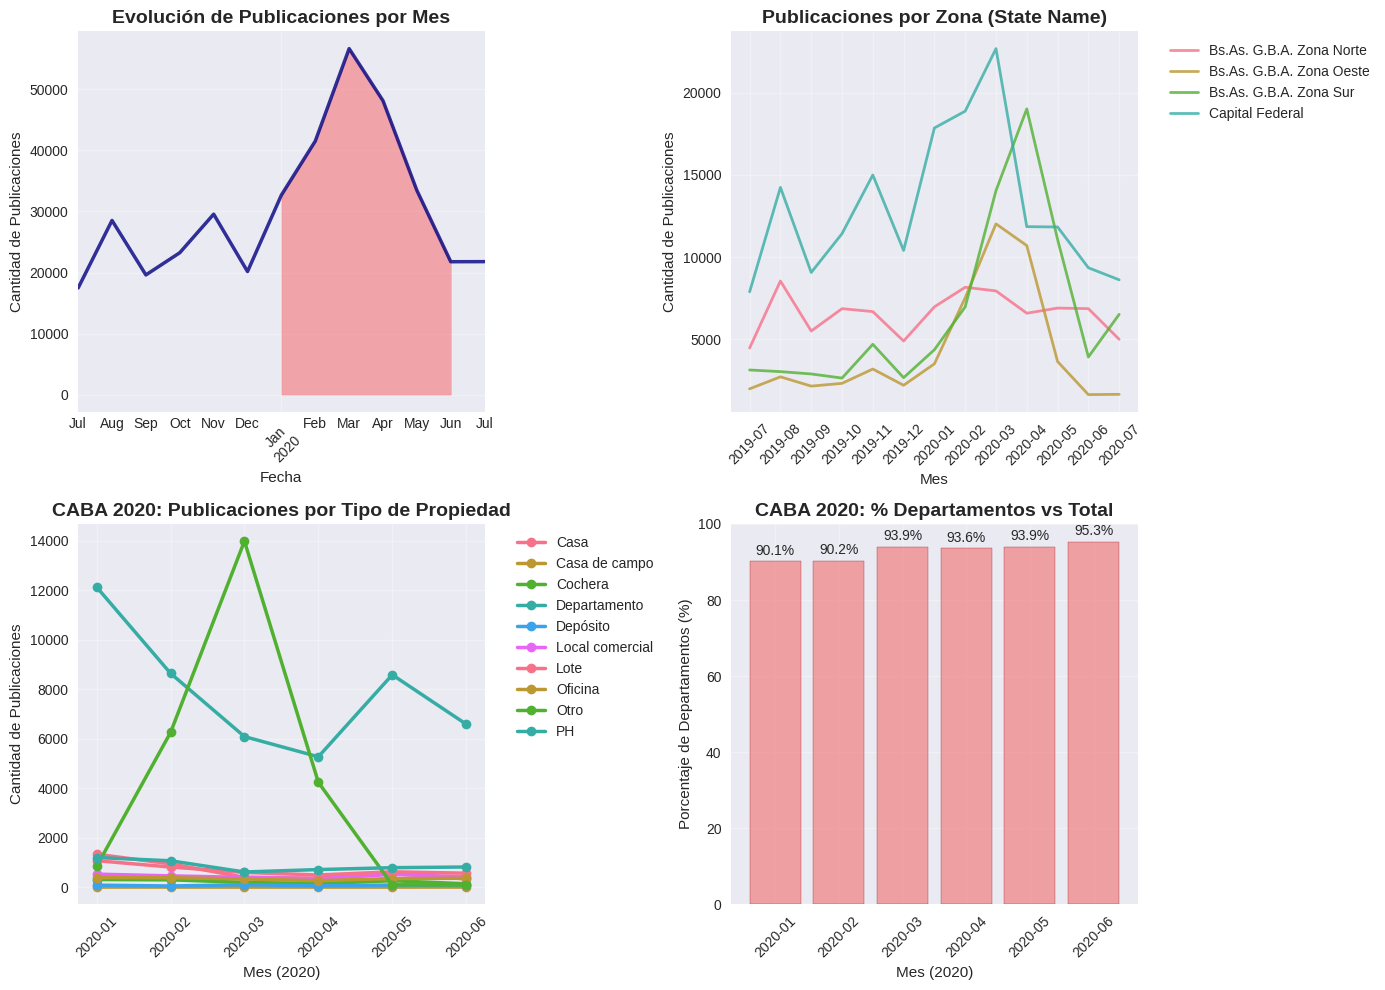


🔍 ANÁLISIS ESTADÍSTICO DETALLADO
📈 ESTADÍSTICAS GENERALES:
Fecha más antigua: 2019-07-04 00:00:00
Fecha más reciente: 2020-07-27 00:00:00
Rango total: 389 days 00:00:00
Total de publicaciones: 394,641

🏙️ DISTRIBUCIÓN POR ZONA:
  Capital Federal: 169,054 propiedades (42.8%)
  Bs.As. G.B.A. Zona Norte: 85,377 propiedades (21.6%)
  Bs.As. G.B.A. Zona Sur: 84,958 propiedades (21.5%)
  Bs.As. G.B.A. Zona Oeste: 55,252 propiedades (14.0%)

🎯 ANÁLISIS CABA - PRIMEROS MESES 2020:
Total publicaciones CABA ene-jun 2020: 92,432

Distribución por tipo de propiedad en CABA 2020:
  Departamento: 47278 propiedades (51.1%)
  Otro: 25474 propiedades (27.6%)
  PH: 5178 propiedades (5.6%)
  Lote: 4142 propiedades (4.5%)
  Casa: 3908 propiedades (4.2%)

🔥 ANÁLISIS DE CORRELACIÓN TEMPORAL


/tmp/ipython-input-3719099947.py:177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caba_data['año_mes'] = caba_data['created_on'].dt.to_period('M')


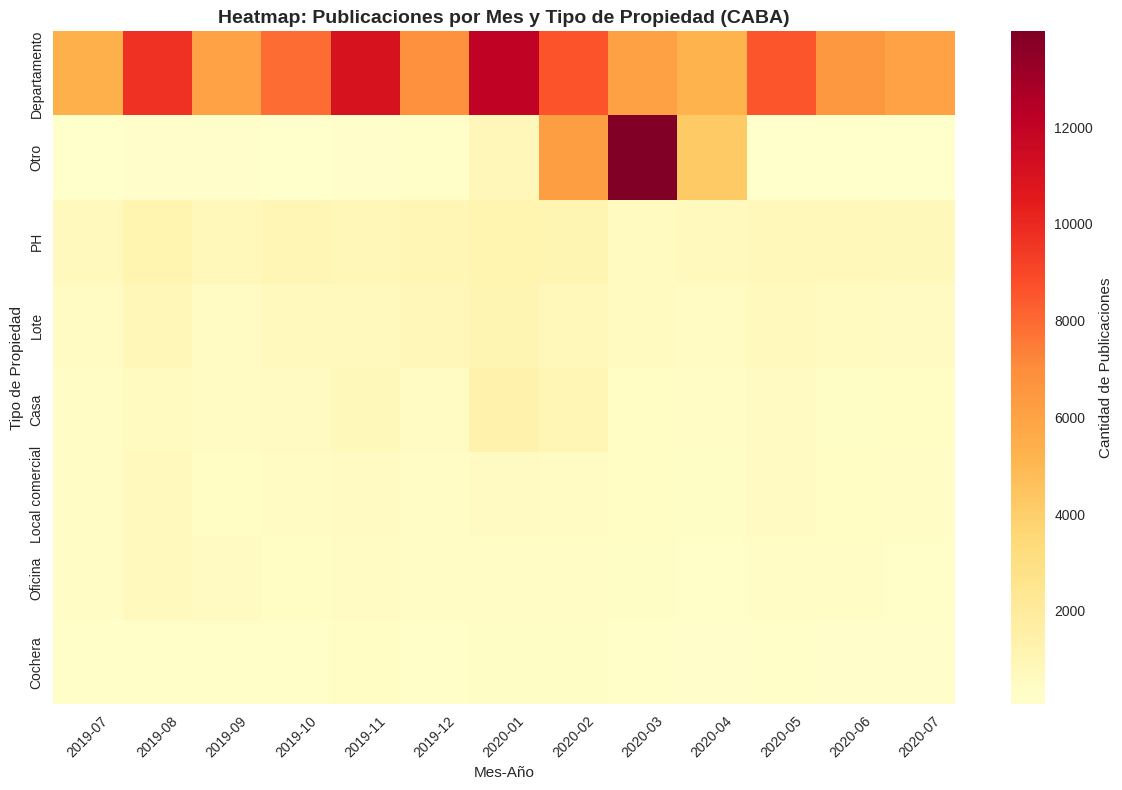


💡 CONCLUSIONES DEL ANÁLISIS TEMPORAL:
• En los primeros 6 meses de 2020, CABA tuvo 92,432 publicaciones
• Los departamentos representaron el 51.1% del total
• Distribución: {'Departamento': 47278, 'Otro': 25474, 'PH': 5178}
• 📉 Tendencia: Disminución en publicaciones de departamentos durante 2020

🎯 Para verificar la hipótesis de migración a zonas verdes:
   - Comparar con datos de GBA (especialmente zonas norte y oeste)
   - Analizar si hubo aumento en publicaciones de casas con jardín
   - Revisar precios promedio por tipo de propiedad


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Convertir la columna created_on a datetime
caba_gba['created_on'] = pd.to_datetime(caba_gba['created_on'])

print("📊 ANÁLISIS TEMPORAL DE PROPIEDADES EN VENTA")
print("=" * 60)

# 1. ANÁLISIS GENERAL POR FECHA
plt.figure(figsize=(14, 10))

# Gráfico 1: Evolución temporal general
plt.subplot(2, 2, 1)
publicaciones_por_mes = caba_gba.set_index('created_on').resample('M').size()
publicaciones_por_mes.plot(linewidth=2.5, color='navy', alpha=0.8)
plt.title('Evolución de Publicaciones por Mes', fontsize=14, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Publicaciones')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Resaltar primeros meses de 2020
if any(publicaciones_por_mes.index.year == 2020):
    primeros_2020 = publicaciones_por_mes[(publicaciones_por_mes.index >= '2020-01-01') &
                                        (publicaciones_por_mes.index <= '2020-06-30')]
    if not primeros_2020.empty:
        plt.fill_between(primeros_2020.index, primeros_2020.values, alpha=0.3, color='red',
                        label='Primeros meses 2020')

# 2. ANÁLISIS POR STATE_NAME (ZONA)
plt.subplot(2, 2, 2)

# Agrupar por mes y zona
caba_gba['mes'] = caba_gba['created_on'].dt.to_period('M')
ventas_por_zona_mes = caba_gba.groupby(['mes', 'state_name']).size().unstack(fill_value=0)

# Plot por zona
for zona in ventas_por_zona_mes.columns:
    plt.plot(ventas_por_zona_mes.index.astype(str), ventas_por_zona_mes[zona],
             label=zona, linewidth=2, alpha=0.8)

plt.title('Publicaciones por Zona (State Name)', fontsize=14, fontweight='bold')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Publicaciones')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# 3. ANÁLISIS ESPECÍFICO: CABA 2020 POR TIPO DE PROPIEDAD
plt.subplot(2, 2, 3)

# Filtrar CABA y primeros meses de 2020
caba_data = caba_gba[caba_gba['state_name'] == 'Capital Federal']
caba_2020 = caba_data[(caba_data['created_on'] >= '2020-01-01') &
                     (caba_data['created_on'] <= '2020-06-30')]

if not caba_2020.empty:
    # Agrupar por mes y tipo de propiedad en CABA 2020
    caba_2020_por_tipo = caba_2020.groupby([caba_2020['created_on'].dt.to_period('M'),
                                           'property_type']).size().unstack(fill_value=0)

    # Plot para CABA 2020
    for tipo_prop in caba_2020_por_tipo.columns:
        plt.plot(caba_2020_por_tipo.index.astype(str), caba_2020_por_tipo[tipo_prop],
                label=tipo_prop, linewidth=2.5, marker='o')

    plt.title('CABA 2020: Publicaciones por Tipo de Propiedad', fontsize=14, fontweight='bold')
    plt.xlabel('Mes (2020)')
    plt.ylabel('Cantidad de Publicaciones')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
else:
    plt.text(0.5, 0.5, 'No hay datos para CABA 2020', ha='center', va='center',
             transform=plt.gca().transAxes, fontsize=12)

# 4. COMPARACIÓN DEPARTAMENTOS vs CASAS EN CABA 2020
plt.subplot(2, 2, 4)

if not caba_2020.empty:
    # Filtrar solo departamentos y casas
    tipos_interes = ['Departamento', 'Casa']
    caba_2020_filtrado = caba_2020[caba_2020['property_type'].isin(tipos_interes)]

    caba_2020_comparativo = caba_2020_filtrado.groupby([
        caba_2020_filtrado['created_on'].dt.to_period('M'),
        'property_type'
    ]).size().unstack(fill_value=0)

    # Calcular proporción
    caba_2020_comparativo['total_mes'] = caba_2020_comparativo.sum(axis=1)
    caba_2020_comparativo['prop_deptos'] = (caba_2020_comparativo.get('Departamento', 0) /
                                           caba_2020_comparativo['total_mes'] * 100)

    # Gráfico de proporción
    plt.bar(caba_2020_comparativo.index.astype(str),
            caba_2020_comparativo['prop_deptos'],
            color='lightcoral', alpha=0.7, edgecolor='darkred')
    plt.title('CABA 2020: % Departamentos vs Total', fontsize=14, fontweight='bold')
    plt.xlabel('Mes (2020)')
    plt.ylabel('Porcentaje de Departamentos (%)')
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)

    # Agregar valores en las barras
    for i, valor in enumerate(caba_2020_comparativo['prop_deptos']):
        plt.text(i, valor + 1, f'{valor:.1f}%', ha='center', va='bottom', fontsize=10)
else:
    plt.text(0.5, 0.5, 'No hay datos para CABA 2020', ha='center', va='center',
             transform=plt.gca().transAxes, fontsize=12)

plt.tight_layout()
plt.show()

# ANÁLISIS ESTADÍSTICO DETALLADO
print("\n🔍 ANÁLISIS ESTADÍSTICO DETALLADO")
print("=" * 50)

# Estadísticas generales
print("📈 ESTADÍSTICAS GENERALES:")
print(f"Fecha más antigua: {caba_gba['created_on'].min()}")
print(f"Fecha más reciente: {caba_gba['created_on'].max()}")
print(f"Rango total: {caba_gba['created_on'].max() - caba_gba['created_on'].min()}")
print(f"Total de publicaciones: {len(caba_gba['created_on'].dropna()):,}")

# Análisis por zona
print(f"\n🏙️ DISTRIBUCIÓN POR ZONA:")
distribucion_zona = caba_gba['state_name'].value_counts()
for zona, cantidad in distribucion_zona.items():
    porcentaje = (cantidad / len(caba_gba)) * 100
    print(f"  {zona}: {cantidad:,} propiedades ({porcentaje:.1f}%)")

# Análisis específico para CABA 2020
if not caba_2020.empty:
    print(f"\n🎯 ANÁLISIS CABA - PRIMEROS MESES 2020:")
    print(f"Total publicaciones CABA ene-jun 2020: {len(caba_2020):,}")

    # Distribución por tipo en CABA 2020
    distribucion_tipo_caba_2020 = caba_2020['property_type'].value_counts()
    print("\nDistribución por tipo de propiedad en CABA 2020:")
    for tipo, cantidad in distribucion_tipo_caba_2020.head().items():
        porcentaje = (cantidad / len(caba_2020)) * 100
        print(f"  {tipo}: {cantidad} propiedades ({porcentaje:.1f}%)")

    # Comparación con mismo período 2019 (si existe)
    caba_2019 = caba_data[(caba_data['created_on'] >= '2019-01-01') &
                         (caba_data['created_on'] <= '2019-06-30')]

    if not caba_2019.empty:
        deptos_2019 = len(caba_2019[caba_2019['property_type'] == 'Departamento'])
        deptos_2020 = len(caba_2020[caba_2020['property_type'] == 'Departamento'])

        if deptos_2019 > 0:
            cambio_porcentual = ((deptos_2020 - deptos_2019) / deptos_2019) * 100
            print(f"\n📊 COMPARACIÓN INTERANUAL:")
            print(f"Departamentos en CABA (ene-jun 2019): {deptos_2019:,}")
            print(f"Departamentos en CABA (ene-jun 2020): {deptos_2020:,}")
            print(f"Cambio porcentual: {cambio_porcentual:+.1f}%")

            if cambio_porcentual < 0:
                print("📉 Disminución en la oferta de departamentos")
            else:
                print("📈 Aumento en la oferta de departamentos")

# GRÁFICO ADICIONAL: Heatmap de correlación temporal
print(f"\n🔥 ANÁLISIS DE CORRELACIÓN TEMPORAL")

# Crear heatmap por mes y tipo de propiedad en CABA
if not caba_data.empty:
    caba_data['año_mes'] = caba_data['created_on'].dt.to_period('M')
    heatmap_data = caba_data.groupby(['año_mes', 'property_type']).size().unstack(fill_value=0)

    # Tomar solo los tipos más comunes para mejor visualización
    tipos_comunes = heatmap_data.sum().nlargest(8).index
    heatmap_data = heatmap_data[tipos_comunes]

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data.T,
                cmap='YlOrRd',
                cbar_kws={'label': 'Cantidad de Publicaciones'})
    plt.title('Heatmap: Publicaciones por Mes y Tipo de Propiedad (CABA)',
              fontsize=14, fontweight='bold')
    plt.xlabel('Mes-Año')
    plt.ylabel('Tipo de Propiedad')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# CONCLUSIÓN DEL ANÁLISIS
print(f"\n💡 CONCLUSIONES DEL ANÁLISIS TEMPORAL:")
print("=" * 50)

if not caba_2020.empty:
    total_caba_2020 = len(caba_2020)
    deptos_caba_2020 = len(caba_2020[caba_2020['property_type'] == 'Departamento'])
    porcentaje_deptos = (deptos_caba_2020 / total_caba_2020) * 100

    print(f"• En los primeros 6 meses de 2020, CABA tuvo {total_caba_2020:,} publicaciones")
    print(f"• Los departamentos representaron el {porcentaje_deptos:.1f}% del total")
    print(f"• Distribución: {dict(caba_2020['property_type'].value_counts().head(3))}")

    # Buscar tendencias mensuales
    if 'Departamento' in caba_2020_por_tipo.columns:
        tendencia_deptos = caba_2020_por_tipo['Departamento'].values
        if len(tendencia_deptos) > 1:
            cambio = tendencia_deptos[-1] - tendencia_deptos[0]
            if cambio > 0:
                print("• 📈 Tendencia: Aumento en publicaciones de departamentos durante 2020")
            elif cambio < 0:
                print("• 📉 Tendencia: Disminución en publicaciones de departamentos durante 2020")
            else:
                print("• ➡️ Tendencia: Estabilidad en publicaciones de departamentos durante 2020")
else:
    print("No hay datos suficientes para el período 2020")


Analizando este periodo de tiempo, especialmente el primer semestre de 2020 surge mi hipótesis que la gente puso en venta propiedades en CABA para mudarse a zonas con más verdes. Era la época de la pandamia y predominaba el home office. Me encontré con que la mayoría de las propiedades en CABA eran dertamentos pero también "otros".
Para un análisis futuro me gustaría poder rastrear qué entra en esa clasificación pero a priori puedo suponer que son locales comerciales u oficinas (los que tengo dentro del data set no representan un % importante y podrían estar mal registrados) que al predominar el aislamiento no era rentable su continuidad y tenían que cerrar.

### 4.  **Limpieza y tratamiento de datos**:
    *   Gestionar valores duplicados y nulos irrelevantes.
    *   Decidir **qué variables conservar** para el modelo.
    *   Imputar valores faltantes (si corresponde).
    *   Detectar y manejar **outliers** (ej. establecer límites razonables de superficie/precio).

Primero vamos a limpiar el data set para quedarnos con tipos de propiedades vinculados a VIVIENDAS (casas, departamentos y PH).

In [30]:
# Definir los tipos de propiedad que nos interesan
tipos_deseados = ['Casa', 'Departamento', 'PH']

# Filtrar el dataset
caba_gba_filtrado = caba_gba[caba_gba['property_type'].isin(tipos_deseados)].copy()

print(f"✅ Dataset filtrado - Total de registros: {len(caba_gba_filtrado)}")
print(f"📊 Distribución por tipo de propiedad:")
print(caba_gba_filtrado['property_type'].value_counts())

✅ Dataset filtrado - Total de registros: 267635
📊 Distribución por tipo de propiedad:
property_type
Departamento    160160
Casa             87088
PH               20387
Name: count, dtype: int64


Ahora verifico los duplicados:

In [31]:
# Verificar duplicados exactos en todas las columnas
duplicados_totales = caba_gba_filtrado.duplicated().sum()
print(f"Duplicados exactos (todas las columnas iguales): {duplicados_totales}")

# Ver duplicados basados solo en columnas clave
columnas_clave = ['lat', 'lon', 'price', 'property_type', 'place_name']
duplicados_clave = caba_gba_filtrado.duplicated(subset=columnas_clave).sum()
print(f"Duplicados en columnas clave {columnas_clave}: {duplicados_clave}")

# Duplicados por ubicación y precio similar
if duplicados_totales == 0:
    print("\n🔍 Buscando duplicados 'casi exactos' (misma ubicación):")

    # Agrupar por coordenadas redondeadas
    caba_gba_filtrado['lat_round'] = caba_gba_filtrado['lat'].round(4)  # Redondear a 4 decimales (~11 metros)
    caba_gba_filtrado['lon_round'] = caba_gba_filtrado['lon'].round(4)

    duplicados_ubicacion = caba_gba_filtrado.duplicated(subset=['lat_round', 'lon_round', 'property_type','price','surface_total','description','title']).sum()
    print(f"Propiedades en misma ubicación, tipo, precio, superficie y descripción: {duplicados_ubicacion}")

    # Mostrar algunos ejemplos de duplicados si existen
    if duplicados_ubicacion > 0:
        print("\n📋 Ejemplos de duplicados encontrados:")
        duplicados_mask = caba_gba_filtrado.duplicated(subset=['lat_round', 'lon_round', 'property_type','price','surface_total','description','title'], keep=False)
        ejemplos_duplicados = caba_gba_filtrado[duplicados_mask].sort_values(['lat_round', 'lon_round']).head(10)
        print(ejemplos_duplicados[['lat', 'lon', 'property_type', 'price', 'place_name', 'title']].to_string())

    # Eliminar columnas temporales
    caba_gba_filtrado = caba_gba_filtrado.drop(['lat_round', 'lon_round'], axis=1)

Duplicados exactos (todas las columnas iguales): 0
Duplicados en columnas clave ['lat', 'lon', 'price', 'property_type', 'place_name']: 93350

🔍 Buscando duplicados 'casi exactos' (misma ubicación):
Propiedades en misma ubicación, tipo, precio, superficie y descripción: 45886

📋 Ejemplos de duplicados encontrados:
          lat    lon property_type     price         place_name                                                                                               title
76113  -64.31 -31.31            PH  77500.00                NaN                          IMPORTANTE CASA A LA VENTA URUGUAY 195, B. JARDIN DE EPICURO VILLA ALLENDE
76116  -64.31 -31.31            PH  77500.00                NaN                          IMPORTANTE CASA A LA VENTA URUGUAY 195, B. JARDIN DE EPICURO VILLA ALLENDE
31533  -59.04 -34.61          Casa 180000.00  General Rodríguez                                                        Casa en venta 5 ambientes en Haras San Pablo
31534  -59.04 -34.61        

Realicé el análisis de duplicados por variables clave. Así me fijé publicaciones que coincidan con la variable descripcion y título, también superficie cubierta y demás, por lo que supongo que están duplicados y serán eliminados de mi data.

In [32]:
# Guardar el tamaño original del dataset filtrado
tamanio_original = len(caba_gba_filtrado)
print(f"📊 Dataset filtrado original: {tamanio_original:,} registros")

# Definir columnas clave para identificar duplicados
columnas_clave = ['lat', 'lon', 'price', 'property_type', 'place_name', 'description', 'title']

# Contar duplicados antes de eliminar
duplicados_count = caba_gba_filtrado.duplicated(subset=columnas_clave).sum()
print(f"🔍 Duplicados identificados: {duplicados_count:,}")

# Eliminar duplicados manteniendo la primera ocurrencia
caba_gba_filtrado = caba_gba_filtrado.drop_duplicates(subset=columnas_clave)

# Verificar resultados
tamanio_final = len(caba_gba_filtrado)
duplicados_restantes = caba_gba_filtrado.duplicated(subset=columnas_clave).sum()

print(f"\n✅ ELIMINACIÓN COMPLETADA:")
print(f"• Registros antes: {tamanio_original:,}")
print(f"• Registros después: {tamanio_final:,}")
print(f"• Duplicados eliminados: {tamanio_original - tamanio_final:,}")
print(f"• Reducción: {(tamanio_original - tamanio_final) / tamanio_original * 100:.1f}%")
print(f"• Duplicados restantes: {duplicados_restantes}")

# Verificación adicional
print(f"\n🔍 VERIFICACIÓN FINAL:")
print(f"¿Dataset filtrado limpio de duplicados? {duplicados_restantes == 0}")

📊 Dataset filtrado original: 267,635 registros
🔍 Duplicados identificados: 44,497

✅ ELIMINACIÓN COMPLETADA:
• Registros antes: 267,635
• Registros después: 223,138
• Duplicados eliminados: 44,497
• Reducción: 16.6%
• Duplicados restantes: 0

🔍 VERIFICACIÓN FINAL:
¿Dataset filtrado limpio de duplicados? True


In [34]:
status(caba_gba_filtrado)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,id,0,0.00,0,0.00,223138,int64
1,ad_type,0,0.00,0,0.00,1,object
2,start_date,0,0.00,0,0.00,346,object
3,end_date,0,0.00,0,0.00,448,object
4,created_on,0,0.00,0,0.00,346,datetime64[ns]
5,lat,29885,0.13,0,0.00,109759,float64
6,lon,29557,0.13,0,0.00,109637,float64
7,country,0,0.00,0,0.00,1,object
8,state_name,0,0.00,0,0.00,4,object
9,place_name,6984,0.03,0,0.00,90,object


Siguiendo con la limpieza, voy a eliminar las columnas que no voy a usar.

In [35]:
caba_gba_filtrado = caba_gba_filtrado.drop(['id', 'country', 'ad_type', 'start_date','end_date','created_on',
                          'l4', 'l5', 'l6', 'currency', 'price_period','title','description','operation_type'], axis=1)

# Verificar que se eliminaron
print(f"✅ Columnas eliminadas: id, ad_type, start_date")
print(f"📊 Dataset ahora tiene {caba_gba.shape[1]} columnas")
print(f"📋 Columnas actuales: {list(caba_gba.columns)}")

✅ Columnas eliminadas: id, ad_type, start_date
📊 Dataset ahora tiene 25 columnas
📋 Columnas actuales: ['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'country', 'state_name', 'place_name', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'currency', 'price_period', 'title', 'description', 'property_type', 'operation_type', 'price']


In [36]:
status(caba_gba_filtrado)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,lat,29885,0.13,0,0.00,109759,float64
1,lon,29557,0.13,0,0.00,109637,float64
2,state_name,0,0.00,0,0.00,4,object
3,place_name,6984,0.03,0,0.00,90,object
4,rooms,34096,0.15,0,0.00,30,float64
5,bedrooms,66917,0.30,5625,0.03,42,float64
6,bathrooms,13903,0.06,0,0.00,17,float64
7,surface_total,85589,0.38,75,0.00,1992,float64
8,surface_covered,74070,0.33,0,0.00,991,float64
9,property_type,0,0.00,0,0.00,3,object


Ahora queda la gestión de los nan (algunos los elimino y otros los imputo) por la mediana por tipo de propiedad por barrio (por el análisis previo asumo que las propiedades entre sí se parecen más por barrio, por ejemplo casas en San Isidro son más parecidas que casas en Mataderos - me faltaría hacer un modelo de clusters para corroborarlo - pero queda para un futuro):

In [37]:
# Primero elimino los NaN en variables clave que porcentualmente son menores
caba_gba_filtrado = caba_gba_filtrado.dropna(subset=['place_name', 'bathrooms', 'lat', 'lon'])

print(f"📊 Registros después de eliminar NaN en variables clave: {len(caba_gba_filtrado):,}")

# Después imputar bedrooms, surface_total, surface_covered, rooms con medianas por tipo de propiedad Y localidad
columnas_a_imputar = ['bedrooms', 'surface_total', 'surface_covered', 'rooms']

for col in columnas_a_imputar:
    print(f"\n🔧 Imputando {col}...")

    # Verificar valores nulos antes
    nulos_antes = caba_gba_filtrado[col].isnull().sum()
    print(f"   Valores nulos antes: {nulos_antes}")

    if nulos_antes > 0:
        # Calcular medianas por property_type y place_name
        medianas_por_tipo_lugar = caba_gba_filtrado.groupby(['property_type', 'place_name'])[col].transform('median')

        # Imputar con la mediana del grupo property_type + place_name
        caba_gba_filtrado[col] = caba_gba_filtrado[col].fillna(medianas_por_tipo_lugar)

        # Si todavía hay NaN (por grupos sin datos), usar mediana solo por property_type
        nulos_despues = caba_gba_filtrado[col].isnull().sum()
        if nulos_despues > 0:
            print(f"   Aún hay {nulos_despues} nulos después de imputar por tipo+lugar")
            medianas_por_tipo = caba_gba_filtrado.groupby('property_type')[col].transform('median')
            caba_gba_filtrado[col] = caba_gba_filtrado[col].fillna(medianas_por_tipo)

        nulos_final = caba_gba_filtrado[col].isnull().sum()
        print(f"   Valores nulos después: {nulos_final}")
    else:
        print(f"   ✅ No había valores nulos en {col}")

# Verificación final de nulos
print(f"\n🔍 VERIFICACIÓN FINAL DE VALORES NULOS:")
print("=" * 50)
for col in columnas_a_imputar + ['bathrooms']:
    nulos = caba_gba_filtrado[col].isnull().sum()
    print(f"{col:<15}: {nulos:>4} nulos ({nulos/len(caba_gba_filtrado)*100:.1f}%)")

📊 Registros después de eliminar NaN en variables clave: 179,902

🔧 Imputando bedrooms...
   Valores nulos antes: 48520
   Aún hay 2 nulos después de imputar por tipo+lugar
   Valores nulos después: 0

🔧 Imputando surface_total...
   Valores nulos antes: 63897
   Aún hay 13 nulos después de imputar por tipo+lugar
   Valores nulos después: 0

🔧 Imputando surface_covered...
   Valores nulos antes: 55770
   Aún hay 10 nulos después de imputar por tipo+lugar
   Valores nulos después: 0

🔧 Imputando rooms...
   Valores nulos antes: 20828
   Valores nulos después: 0

🔍 VERIFICACIÓN FINAL DE VALORES NULOS:
bedrooms       :    0 nulos (0.0%)
surface_total  :    0 nulos (0.0%)
surface_covered:    0 nulos (0.0%)
rooms          :    0 nulos (0.0%)
bathrooms      :    0 nulos (0.0%)


In [38]:
# Ver estadísticas después de la imputación
print(f"\n📈 ESTADÍSTICAS DESPUÉS DE LA IMPUTACIÓN:")
print("=" * 60)

for col in columnas_a_imputar:
    print(f"\n🏠 {col.upper()}:")
    stats = caba_gba_filtrado[col].describe()
    print(f"   Mínimo: {stats['min']:.0f}")
    print(f"   Máximo: {stats['max']:.0f}")
    print(f"   Mediana: {stats['50%']:.0f}")
    print(f"   Promedio: {stats['mean']:.1f}")


📈 ESTADÍSTICAS DESPUÉS DE LA IMPUTACIÓN:

🏠 BEDROOMS:
   Mínimo: -3
   Máximo: 335
   Mediana: 2
   Promedio: 2.2

🏠 SURFACE_TOTAL:
   Mínimo: 0
   Máximo: 169000
   Mediana: 82
   Promedio: 187.7

🏠 SURFACE_COVERED:
   Mínimo: 1
   Máximo: 235000
   Mediana: 70
   Promedio: 119.1

🏠 ROOMS:
   Mínimo: 1
   Máximo: 40
   Mediana: 3
   Promedio: 3.1


In [39]:
status(caba_gba_filtrado)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,lat,0,0.00,0,0.00,103066,float64
1,lon,0,0.00,0,0.00,102889,float64
2,state_name,0,0.00,0,0.00,4,object
3,place_name,0,0.00,0,0.00,89,object
4,rooms,0,0.00,0,0.00,31,float64
5,bedrooms,0,0.00,3835,0.02,33,float64
6,bathrooms,0,0.00,0,0.00,17,float64
7,surface_total,0,0.00,31,0.00,1846,float64
8,surface_covered,0,0.00,0,0.00,959,float64
9,property_type,0,0.00,0,0.00,3,object


Elimino outliers:

In [40]:
# ELIMINO OUTLIERS DE SURFACE_TOTAL y SURFACE_COVERED. ME QUEDO CON LOS P1-P90
# ya vi en el anáisis previo que hay casos negativos y muy grandes.

for col in ['surface_total', 'surface_covered']:
    p1 = caba_gba_filtrado[col].quantile(0.01)
    p90 = caba_gba_filtrado[col].quantile(0.90)
    caba_gba_filtrado = caba_gba_filtrado[(caba_gba_filtrado[col] >= p1) & (caba_gba_filtrado[col] <= p90)]
    print(f"{col}: {p1:.0f} a {p90:.0f} m²")

print(f"Registros: {len(caba_gba_filtrado):,}")

surface_total: 27 a 323 m²
surface_covered: 28 a 172 m²
Registros: 145,388


In [41]:
# ELIMINO OUTLIERS DE BEDROOMS, ROOMS Y BATHROOMS. ME QUEDO CON LOS P1-P90

for col in ['bedrooms', 'rooms', 'bathrooms']:
    p1 = caba_gba_filtrado[col].quantile(0.01)
    p90 = caba_gba_filtrado[col].quantile(0.90)
    caba_gba_filtrado = caba_gba_filtrado[(caba_gba_filtrado[col] >= p1) & (caba_gba_filtrado[col] <= p90)]
    print(f"{col}: {p1:.0f} a {p90:.0f}")

print(f"Registros: {len(caba_gba_filtrado):,}")

bedrooms: 0 a 3
rooms: 1 a 4
bathrooms: 1 a 2
Registros: 126,487


In [42]:
# ELIMINO OUTLIERS DE LAT Y LON. ME QUEDO CON LOS P1-P90
# porque en el análisis de las variables vimos puntos muy extramos que no
# correspondían al agrupamiento de CABA/GBA.


for col in ['lat', 'lon']:
    p1 = caba_gba_filtrado[col].quantile(0.01)
    p90 = caba_gba_filtrado[col].quantile(0.90)
    caba_gba_filtrado = caba_gba_filtrado[(caba_gba_filtrado[col] >= p1) & (caba_gba_filtrado[col] <= p90)]
    print(f"{col}: {p1:.6f} a {p90:.6f}")

print(f"Registros: {len(caba_gba_filtrado):,}")

lat: -58.871235 a -58.319642
lon: -34.822570 a -34.513142
Registros: 100,191


In [43]:
# ELIMINO OUTLIERS DE PRICE. ME QUEDO CON LOS P1-P90

p1 = caba_gba_filtrado['price'].quantile(0.01)
p90 = caba_gba_filtrado['price'].quantile(0.90)
caba_gba_filtrado = caba_gba_filtrado[(caba_gba_filtrado['price'] >= p1) & (caba_gba_filtrado['price'] <= p90)]
print(f"price: ${p1:,.0f} a ${p90:,.0f} USD")

print(f"Registros: {len(caba_gba_filtrado):,}")

price: $45,000 a $270,000 USD
Registros: 89,402


In [45]:
# ELIMINO FINALMENTE LAT - LON que tampoco lo voy a utilizar:
caba_gba_filtrado = caba_gba_filtrado.drop(['lat','lon'], axis=1)

### 5) Guardo el dataset limpio:

In [47]:
caba_gba_filtrado.to_csv('/content/drive/MyDrive/EDVAI/dataset/processed.csv', index=False)

## CONCLUSIONES

In [48]:
print("🏠 CONCLUSIONES DE NEGOCIO - PROPIEDADES FILTRADAS (Casas, Departamentos, PH)")
print("=" * 70)

# 1. PRECIO PROMEDIO POR ZONA PRINCIPAL (state_name)
print("\n💰 PRECIO PROMEDIO POR ZONA PRINCIPAL:")
precio_por_zona = caba_gba_filtrado.groupby('state_name')['price'].agg(['mean', 'count']).round(0)
precio_por_zona = precio_por_zona.sort_values('mean', ascending=False)

for zona, (precio, cantidad) in precio_por_zona.iterrows():
    print(f"📍 {zona}: ${precio:,.0f} | {cantidad:,} propiedades")

# 2. COMPARACIÓN CABA vs GBA
print(f"\n🏙️ COMPARACIÓN CABA vs GBA:")
caba = caba_gba_filtrado[caba_gba_filtrado['state_name'] == 'Capital Federal']
gba_norte = caba_gba_filtrado[caba_gba_filtrado['state_name'] == 'Bs.As. G.B.A. Zona Norte']
gba_sur = caba_gba_filtrado[caba_gba_filtrado['state_name'] == 'Bs.As. G.B.A. Zona Sur']
gba_oeste = caba_gba_filtrado[caba_gba_filtrado['state_name'] == 'Bs.As. G.B.A. Zona Oeste']

print(f"CABA: {len(caba):,} propiedades | ${caba['price'].mean():,.0f}")
print(f"GBA Norte: {len(gba_norte):,} propiedades | ${gba_norte['price'].mean():,.0f}")
print(f"GBA Oeste: {len(gba_oeste):,} propiedades | ${gba_oeste['price'].mean():,.0f}")
print(f"GBA Sur: {len(gba_sur):,} propiedades | ${gba_sur['price'].mean():,.0f}")

# 3. DIFERENCIA ENTRE ZONA MÁS CARA Y MÁS BARATA
zona_mas_cara = precio_por_zona.index[0]
zona_mas_barata = precio_por_zona.index[-1]
diferencia = precio_por_zona['mean'].iloc[0] - precio_por_zona['mean'].iloc[-1]
diferencia_porcentual = (diferencia / precio_por_zona['mean'].iloc[-1]) * 100

print(f"\n📊 BRECHA DE PRECIOS:")
print(f"📍 {zona_mas_cara} es {diferencia_porcentual:.0f}% más caro que {zona_mas_barata}")

# 4. BARRIOS/LOCALIDADES MÁS CAROS DENTRO DE CADA ZONA
print(f"\n🏆 BARRIOS/LOCALIDADES MÁS CAROS POR ZONA:")

for zona in precio_por_zona.index:
    zona_data = caba_gba_filtrado[caba_gba_filtrado['state_name'] == zona]
    if len(zona_data) > 0:  # Verificar que hay datos
        barrios_caros = zona_data.groupby('place_name')['price'].mean().sort_values(ascending=False).head(3)

        print(f"\n📍 {zona}:")
        for barrio, precio in barrios_caros.items():
            print(f"   • {barrio}: ${precio:,.0f}")

# 5. TIPOS DE PROPIEDAD POR ZONA PRINCIPAL
print(f"\n🏘️ DISTRIBUCIÓN DE TIPOS DE PROPIEDAD POR ZONA:")
for zona in precio_por_zona.index:
    zona_data = caba_gba_filtrado[caba_gba_filtrado['state_name'] == zona]
    if len(zona_data) > 0:
        tipo_mas_comun = zona_data['property_type'].value_counts()

        print(f"\n📍 {zona}:")
        for tipo, count in tipo_mas_comun.items():
            porcentaje = (count / len(zona_data)) * 100
            print(f"   • {tipo}: {count} propiedades ({porcentaje:.1f}%)")

# 6. CARACTERÍSTICAS PROMEDIO DE LAS PROPIEDADES FILTRADAS
print(f"\n📊 CARACTERÍSTICAS PROMEDIO (PROPIEDADES FILTRADAS):")
print(f"• Ambientes: {caba_gba_filtrado['rooms'].mean():.1f}")
print(f"• Dormitorios: {caba_gba_filtrado['bedrooms'].mean():.1f}")
print(f"• Baños: {caba_gba_filtrado['bathrooms'].mean():.1f}")
print(f"• Superficie total: {caba_gba_filtrado['surface_total'].mean():.0f} m²")
print(f"• Superficie cubierta: {caba_gba_filtrado['surface_covered'].mean():.0f} m²")

# 7. ANÁLISIS ADICIONAL ESPECÍFICO PARA PROPIEDADES FILTRADAS
print(f"\n🎯 ANÁLISIS ESPECÍFICO POR TIPO DE PROPIEDAD:")
tipos_propiedad = caba_gba_filtrado['property_type'].unique()

for tipo in tipos_propiedad:
    tipo_data = caba_gba_filtrado[caba_gba_filtrado['property_type'] == tipo]
    print(f"\n🏠 {tipo.upper()}:")
    print(f"   • Cantidad: {len(tipo_data):,} propiedades")
    print(f"   • Precio promedio: ${tipo_data['price'].mean():,.0f}")
    print(f"   • Precio mediano: ${tipo_data['price'].median():,.0f}")
    print(f"   • Ambientes promedio: {tipo_data['rooms'].mean():.1f}")
    print(f"   • Superficie promedio: {tipo_data['surface_total'].mean():.0f} m²")

# 8. RESUMEN EJECUTIVO
print(f"\n📈 RESUMEN EJECUTIVO - DATASET FILTRADO:")
print("=" * 50)
print(f"• Total de propiedades analizadas: {len(caba_gba_filtrado):,}")
print(f"• Zona más cara: {zona_mas_cara} (${precio_por_zona['mean'].iloc[0]:,.0f})")
print(f"• Zona más económica: {zona_mas_barata} (${precio_por_zona['mean'].iloc[-1]:,.0f})")
print(f"• Tipo de propiedad más común: {caba_gba_filtrado['property_type'].value_counts().index[0]}")
print(f"• Brecha de precios: {diferencia_porcentual:.0f}%")

🏠 CONCLUSIONES DE NEGOCIO - PROPIEDADES FILTRADAS (Casas, Departamentos, PH)

💰 PRECIO PROMEDIO POR ZONA PRINCIPAL:
📍 Capital Federal: $144,851 | 52,765.0 propiedades
📍 Bs.As. G.B.A. Zona Norte: $125,817 | 6,198.0 propiedades
📍 Bs.As. G.B.A. Zona Sur: $120,953 | 14,126.0 propiedades
📍 Bs.As. G.B.A. Zona Oeste: $109,402 | 16,313.0 propiedades

🏙️ COMPARACIÓN CABA vs GBA:
CABA: 52,765 propiedades | $144,851
GBA Norte: 6,198 propiedades | $125,817
GBA Oeste: 16,313 propiedades | $109,402
GBA Sur: 14,126 propiedades | $120,953

📊 BRECHA DE PRECIOS:
📍 Capital Federal es 32% más caro que Bs.As. G.B.A. Zona Oeste

🏆 BARRIOS/LOCALIDADES MÁS CAROS POR ZONA:

📍 Capital Federal:
   • Puerto Madero: $198,684
   • Las Cañitas: $176,780
   • Belgrano: $167,630

📍 Bs.As. G.B.A. Zona Norte:
   • San Isidro: $173,100
   • Vicente López: $169,488
   • General San Martín: $111,480

📍 Bs.As. G.B.A. Zona Sur:
   • Ezeiza: $188,738
   • Almirante Brown: $150,758
   • Lomas de Zamora: $127,349

📍 Bs.As. G.B.

In [49]:
print("\n" + "=" * 60)
print("📈 STORYTELLING - MERCADO INMOBILIARIO BS.AS.")
print("=" * 60)

print(f"""

1. **DOMINIO DE CABA**: Con {len(caba):,} propiedades, Capital Federal concentra el {len(caba)/len(caba_gba_filtrado)*100:.0f}% de la oferta del mercado, liderando en volumen y precio.

2. **SEGMENTACIÓN GEOGRÁFICA**: {zona_mas_cara} presenta propiedades un {diferencia_porcentual:.0f}% más caras que {zona_mas_barata}, evidenciando la fuerte valorización por ubicación.

3. **OFERTA DISTRIBUIDA EN GBA**: Las zonas del Gran Buenos Aires muestran una oferta equilibrada, con GBA Oeste ({len(gba_oeste):,} prop.) y GBA Sur ({len(gba_sur):,} prop.) liderando fuera de CABA.

4. **MERCADO FAMILIAR**: El promedio de {caba_gba_filtrado['rooms'].mean():.1f} ambientes y {caba_gba_filtrado['bedrooms'].mean():.1f} dormitorios indica un mercado orientado a familias.

5. **OPORTUNIDADES DE INVERSIÓN**: La brecha de precios entre zonas sugiere oportunidades para inversores según perfil de riesgo y rendimiento esperado.
""")


📈 STORYTELLING - MERCADO INMOBILIARIO BS.AS.


1. **DOMINIO DE CABA**: Con 52,765 propiedades, Capital Federal concentra el 59% de la oferta del mercado, liderando en volumen y precio.

2. **SEGMENTACIÓN GEOGRÁFICA**: Capital Federal presenta propiedades un 32% más caras que Bs.As. G.B.A. Zona Oeste, evidenciando la fuerte valorización por ubicación.

3. **OFERTA DISTRIBUIDA EN GBA**: Las zonas del Gran Buenos Aires muestran una oferta equilibrada, con GBA Oeste (16,313 prop.) y GBA Sur (14,126 prop.) liderando fuera de CABA.

4. **MERCADO FAMILIAR**: El promedio de 2.4 ambientes y 1.7 dormitorios indica un mercado orientado a familias.

5. **OPORTUNIDADES DE INVERSIÓN**: La brecha de precios entre zonas sugiere oportunidades para inversores según perfil de riesgo y rendimiento esperado.

